# Lending Club Case Study

## Introduction
This case study explores **loan default risk** for **Lending Club**, a consumer finance company and online marketplace specializing in various types of loans for urban customers. By leveraging **data-driven insights** and **Exploratory Data Analysis (EDA)**, our goal is to identify characteristics associated with **high-risk applicants** who are more likely to default on loans. Understanding these characteristics is crucial for reducin **credit loss**—a significant financial impact for lenders.


Like most other lending companies, extending loans to **risky applicants** is the primary source of financial loss, known as **credit loss**. This loss occurs when borrowers are unwilling or unable to repay their loans. In this context, applicants labeled as **'charged-off'** are considered **defaulters**, representing the group most responsible for such financial setbacks. 


## Problem Statement
When reviewing loan applications, the company faces two main risks:
1. **Missed Business Opportunity**: Declining loans for applicants who could repay leads to potential business loss.
2. **Financial Loss**: Approving loans for high-risk applicants who default results in direct financial loss.

Thus, identifying **predictive risk factors** related to loan default is essential to make informed, balanced lending decisions.

## Loan Decision Scenarios
When an individual applies for a loan, the company makes one of two decisions:

1. **Loan Accepted**: If the loan is approved, three possible outcomes exist:
   - **Fully Paid**: The applicant has repaid the loan, covering both principal and interest.
   - **Current**: The applicant is currently paying installments; the loan term is ongoing and has not defaulted.
   - **Charged-off**: The applicant has not made required payments over an extended period, leading to a loan default.

2. **Loan Rejected**: If the loan is declined due to a high-risk profile, the applicant has no transactional history with the company. Thus, data on rejected applicants is not included in this dataset.

## Objective
#### This analysis aims to:
- Perform **Exploratory Data Analysis** to uncover key patterns and characteristics that distinguish high-risk (likely-to-default) applicants from low-risk ones.
- Utilize insights to enable the company to reduce **credit losses** by identifying and mitigating **risk factors** effectively, ultimately improving decision-making around loan approvals.


Through this EDA, we aim to provide actionable insights that balance **risk management** with **business growth**, allowing the company to optimize its lending strategies based on historical applicant and loan data.


## Dataset Description
The dataset consists of records for loans issued from 2007 to 2011, including details of each applicant’s profile, loan characteristics, and loan outcomes (fully paid, current, or charged-off). This data will be analyzed to uncover relationships between applicant attributes and loan default risk.

## Approach and Methodology
To address the business objective, we will employ Exploratory Data Analysis (EDA) to analyze the dataset. This involves:

1. **Data Overview and Understanding:** Examining the data to understand its structure, types of variables, and properties, which will help guide the analysis.
2. **Data Cleaning and Manipulation:** Cleaning & fixing rows & columns, handling missing values, treating outliers, & ensuring overall data quality.
3. **Data Analysis**: The goal of Data Analysis is to uncover insights and patterns in the data that are relevant to the business objective. <br>
3.1 **Univariate Analysis:** Assessing individual variables to explore their distribution, detect outliers, and understand the dataset composition. <br>
3.2 **Bivariate Analysis:** Investigating relationships between variables, particularly against the target variable (loan_status), to identify patterns and correlations. <br>
4. **Visualization:** Using graphs and charts to visually summarize and highlight important insights.
5. **Observations and Recommendations:** Summarizing key findings, providing actionable recommendations, and addressing the business objective through data-driven insights.

## 1. Data Overview and Understanding
1. Import libraries
2. Load loan dataset
3. Data Overview and Initial Exploration

### 1.1 Import libraries

In [5367]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

### 1.2 Load loan dataset

In [5369]:
# Loading loan data using Pandas' read_csv and read_excel methods.
loan_data = pd.read_csv('loan.csv')

### 1.3 Data Overview and Initial Exploration

In [5371]:
# Viewing the first 5 rows of the loan data:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5372]:
# Initial shape of the dataset
original_shape = loan_data.shape
print('Initial shape of the dataset:', original_shape)
# Number of rows in the dataset
print('Number of rows in the dataset:', original_shape[0])
# Number of columns in the dataset
print('Number of columns in the dataset:', original_shape[1])

Initial shape of the dataset: (39717, 111)
Number of rows in the dataset: 39717
Number of columns in the dataset: 111


In [5373]:
# View the column names in the dataset
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5374]:
# Summary of the dataset's structure, including data types and non-null counts
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5375]:
# Generate descriptive statistics for numerical columns in the dataset
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5376]:
# Display basic statistics for all columns, including non-numeric ones
loan_data.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,NaN,NaN,208.874874,NaN,NaN,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,NaN,NaN,15.690000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,NaN,NaN,167.020000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,NaN,NaN,280.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,NaN,NaN,430.780000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN


---

## 2. Data Cleaning and Manipulation

1. Fix Rows and Columns
2. Handling Missing Data
3. Check for Unique Values
4. Filtering Data
   1. Deduplicate Data
   2. Filter Columns
   3. Filter Rows
5. Imputing Missing Values
6. Standardising Variables
7. Derived Metrics
9. Outlier Detection & Treatment

### 2.1 Fix Rows and Columns
1. #### Rows analysis
    1. **Delete summary rows:** No total, subtotal rows found in the dataset.
    2. **Delete incorrect rows:** No header and footer rows found in the dataset.
    3. **Delete extra rows**: No blank and column no indicator found in the data set.
    4. **Rows with loan status as 'Current' will be removed:** Rows with the loan status as 'Current' will be removed, as they represent applicants who are still in the process of repaying their installments, meaning the loan tenure is not yet complete. These rows are irrelevant and do not contribute to the analysis.
    5. **Duplicate rows**: Duplicate rows, if any, will be removed.
2. #### Columns analysis
   1. The 54 columns containing 100% NULL values will be removed.
   2. Columns with over 60% NULL values will be removed.
   3. 9 columns with a single value that do not contribute to the analysis will be removed.
   4. The columns (`id`, `member_id`) will be removed as they are index variables with unique values and are irrelevant to the analysis.
   5. Columns that capture customer behavior data after loan approval will be dropped as they reflect post-approval metrics not available at the time of approval and cannot be used for predictive analysis or evaluating initial creditworthiness. This ensures relevance in our analysis.
   6. The columns `emp_title`, `desc`, `title`, and `url` will be removed as they contain descriptive text that does not add meaningful value to the analysis.
   7. The `zip_code` column, which contains masked data, will be dropped as it is unsuitable for analysis and irrelevant to meaningful insights.

### 2.2 Handling Missing Data: Identification and Removal of High NULL Columns

#### Calculate the percentage of NULL values in each column to identify those with high missing data.

In [5383]:
# User-defined function to calculate the percentage of missing (null) values in the entire dataset and sort it in descending order
def null_percentage_in_dataset():
    return round(100*(loan_data.isnull().sum()/loan_data.shape[0]), 2).sort_values(ascending=False)

In [5384]:
null_percentage_in_dataset()

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

#### Columns with 100% NULL values provide no useful information for analysis, as they do not contribute any meaningful data. Hence, these columns will be removed.

In [5386]:
loan_data.dropna(axis=1, how='all', inplace=True)

In [5387]:
print('Total no of columns removed:', original_shape[1] - loan_data.shape[1])

Total no of columns removed: 54


#### Recheck the dataset to find columns still containing NULL values

In [5389]:
null_percentage_in_dataset()

next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

#### It can be observed there are columns with >=60% of NULL values. Columns with a high percentage of missing data (e.g., >60%) may not be reliable or useful for analysis and could skew the results.Therefore, these columns will be removed.

In [5391]:
loan_data = loan_data.loc[:, null_percentage_in_dataset()<60]

In [5392]:
null_percentage_in_dataset()

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [5393]:
# Check the shape of the dataframe
loan_data.shape

(39717, 54)

### 2.3 Checking for Unique Values 
##### This step identifies columns with only one unique value. Columns with no variation (single-valued) do not offer meaningful insights since they don't help in distinguishing between different loan cases.

In [5395]:
#  Check the count of unique values in each column to identify single-valued columns
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

##### Removing Irrelevant Columns: By filtering out these single-valued columns, we focus the analysis on features with variability, which can provide valuable information and contribute to meaningful insights.

In [5397]:
# Remove single-valued columns from the dataset
loan_data = loan_data.loc[:,loan_data.nunique()>1]

In [5398]:
# Check the shape of the dataframe
loan_data.shape

(39717, 45)

### 2.4 Filter Data

#### A. Deduplicate data

In [5401]:
# Identifying duplicate records. If any duplicates are found, they will be removed.
loan_data[loan_data.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


##### No duplicate records found.

#### B. Filter Columns: Remove irrelevant columns

**Dropping columns** that capture **customer behavior data** recorded **after loan approval**. These columns reflect **post-approval metrics**. Since this data is **unavailable at the time of loan approval**, it **cannot be used for predictive analysis** or as input in evaluating **initial creditworthiness**. **Removing** these columns helps maintain **relevance** in our analysis.

In [5405]:
loan_data = loan_data.drop(['delinq_2yrs', 'earliest_cr_line',
                            'inq_last_6mths', 'open_acc','pub_rec',
                            'revol_bal', 'revol_util', 'total_acc',
                            'out_prncp', 'out_prncp_inv', 'total_pymnt',
                            'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                            'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                            'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis=1)

The columns **`id`** and **`member_id`** are **unique identifiers**, serving only as **index variables**. Since they do not provide any **meaningful contribution** to the **analysis** or **predictive modeling**, they will be **dropped** to streamline the **dataset**.

In [5407]:
loan_data = loan_data.drop(['id', 'member_id'], axis=1)

 The columns **`emp_title`**, **`desc`**, **`title`**, and **`url`** will be removed as they contain **descriptive text** and do not provide any meaningful contribution to the analysis. These columns are either **unrelated to the loan’s outcome** or are **random variables** that introduce **noise**. Specifically, the **`url`** column is **redundant** as it contains a **static path** with the loan ID appended, which is already represented by the **id** column.

In [5409]:
loan_data = loan_data.drop(['emp_title', 'desc', 'title', 'url'], axis=1)

##### Dropping `zip_code` as it contains masked data, making it unsuitable for analysis and not contributing to meaningful insights

In [5411]:
loan_data = loan_data.drop(['zip_code'], axis=1)

In [5412]:
# Check the shape of the dataframe
loan_data.shape

(39717, 18)

#### C. Filter Rows

**Rows** with **loan_status = 'Current'** indicate applicants who are actively making payments, and the loan tenure is ongoing. Since these loans are still in progress, they do not provide conclusive information on whether the applicant will eventually default or fully repay the loan. Therefore, these rows are not useful for predicting default risk and will be excluded from analyses focused on loan outcome decisions.

In [5415]:
loan_data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [5416]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [5417]:
# Check the shape of the dataframe
loan_data.shape

(38577, 18)

### 2.5 Imputing Missing Values

In [5419]:
# User-defined function to compute the percentage of missing values in a specified column
def calc_column_null_perc(column):
    percentage = round(100 * (loan_data[column].isnull().sum() / loan_data.shape[0]), 2)
    return f"{percentage}%"

#### emp_length column

In [5421]:
# Percentage of missing values in emp_length column:
print(calc_column_null_perc('emp_length'))

2.68%


In [5422]:
loan_data['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

##### Imputing missing values in the 'emp_length' column using the mode ('10+ years') as it is the most frequent category. Dropping rows would result in 2.68% data loss, which is unnecessary given the column's potential importance in predicting creditworthiness. Using the mode preserves the overall distribution and ensures consistency in the dataset.

In [5424]:
loan_data['emp_length'] = loan_data['emp_length'].fillna(loan_data['emp_length'].mode()[0])

In [5425]:
# Confirming that missing values have been successfully imputed in the 'emp_length' column
print(calc_column_null_perc('emp_length'))

0.0%


#### pub_rec_bankruptcies column

In [5427]:
# Percentage of missing values in pub_rec_bankruptcies column:
print(calc_column_null_perc('pub_rec_bankruptcies'))

1.81%


In [5428]:
# Identify the most frequently occuring value in pub_rec_bankruptcies
loan_data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

In [5429]:
round((loan_data['pub_rec_bankruptcies'].value_counts()/loan_data.shape[0])*100,2)

pub_rec_bankruptcies
0.0    93.94
1.0     4.24
2.0     0.01
Name: count, dtype: float64

##### Imputing missing values in the 'pub_rec_bankruptcies' column with 0, as the majority of values (93.94%) are 0. This aligns with the heavily skewed distribution and prevents assuming bankruptcy where data is missing. Dropping rows would result in 1.81% data loss without adding analytical value.

In [5431]:
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(loan_data['pub_rec_bankruptcies'].mode()[0])

In [5432]:
# Confirming that missing values have been successfully imputed in the 'pub_rec_bankruptcies' column
print(calc_column_null_perc('pub_rec_bankruptcies'))

0.0%


##### Check if all missing values have been addressed by verifying that there are no null values left in the dataset

In [5434]:
null_percentage_in_dataset()

loan_amnt               0.0
funded_amnt             0.0
dti                     0.0
addr_state              0.0
purpose                 0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
emp_length              0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
term                    0.0
funded_amnt_inv         0.0
pub_rec_bankruptcies    0.0
dtype: float64

#### The dataset no longer contains any null values, indicating successful handling of missing data.

In [5436]:
loan_data.shape

(38577, 18)

#### Let’s assess how much data has been lost after removing rows with null values and dropping irrelevant columns. We will examine the percentage of rows and columns lost after cleaning the dataset. This provides a complete picture of both rows and columns removed during the data cleaning process.

In [5438]:
print(f'Percentage of rows lost: {round(100 - ((loan_data.shape[0]/original_shape[0])*100), 2)}')
print(f'Percentage of columns lost: {round(100 - ((loan_data.shape[1]/original_shape[1])*100), 2)}')

Percentage of rows lost: 2.87
Percentage of columns lost: 83.78


### 2.6 Standardising Variables

In [5440]:
# Checking information of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [5441]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


##### Convert the columns `loan_amnt` and `funded_amnt` to float data type to ensure consistency and accuracy for numerical computations.

In [5443]:
loan_data[['loan_amnt', 'funded_amnt']] = loan_data[['loan_amnt', 'funded_amnt']].astype('float')

##### Convert the `term` column from string format (e.g., '36 months') to an integer representing the number of months.

In [5445]:
loan_data['term'] = loan_data['term'].apply(lambda x: int(x.replace(' months', '')))

##### Convert the `int_rate` column from string format (e.g., '10.65%') to a float representing the interest rate without the percentage symbol.

In [5447]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x.replace('%', '')))

##### Converting the 'emp_length' column to integer values for more effective statistical analysis. This transformation is necessary to treat 'emp_length' as numerical data rather than as categorical values.
The conversion follows this logic:<br>
`< 1 year`: 0 <br>
`2 years`: 2 <br>
`3 years`: 3 <br>
`4 years`: 4 <br>
`5 years`: 5 <br>
`1 year`: 1 <br>
`6 years`: 6 <br>
`7 years`: 7 <br>
`8 years`: 8 <br>
`9 years`: 9 <br>
`10+ years`: 10

In [5449]:
loan_data['emp_length'].value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [5450]:
# Converting the 'emp_length' column to integer values
emp_length_mapping = {'< 1 year': 0, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, 
                      '1 year': 1, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}
loan_data['emp_length'] = loan_data['emp_length'].replace(emp_length_mapping)

In [5451]:
# Checking the value counts of the 'emp_length' column to verify the successful conversion
loan_data['emp_length'].value_counts()

emp_length
10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: count, dtype: int64

In [5452]:
# Checking the first 5 rows and the dataframe info to verify successful conversions and ensure data integrity.
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [5453]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  int64  
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

### 2.7 Derived Metrics

**Deriving Year (`issue_y`), Month (`issue_m`), and Quarter (`issue_q`) from `issue_d` Date Column**
##### Reason: 
Extracting the year, month, and quarter from the issue_d column enables a time-based analysis of loan issuance trends, facilitating the identification of seasonal patterns, cyclical behaviors, and temporal variations in the data.

In [5456]:
# Convert issue_d to datetime format
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')

# Derive 'issue_y' as full year, 'issue_m' as month number, and 'issue_q' as quarter
loan_data['issue_y'] = loan_data['issue_d'].dt.year
loan_data['issue_m'] = loan_data['issue_d'].dt.month
loan_data['issue_q'] = loan_data['issue_d'].dt.quarter

**Create a new `loan_paid` column by mapping 'Fully Paid' to 'Yes' and 'Charged Off' to 'No' based on the `loan_status` column**
##### Reason:
Simplifying the loan_status column into a binary indicator (loan_paid) helps clearly differentiate between paid-off and defaulted loans, making it easier to analyze the factors contributing to defaults.

In [5458]:
loan_status_mapping = {'Fully Paid': 'Yes', 'Charged Off': 'No'}
loan_data['loan_paid'] = loan_data['loan_status'].replace(loan_status_mapping)

In [5459]:
loan_data[['loan_status', 'loan_paid']]

,loan_status,loan_paid
0,Fully Paid,Yes
1,Charged Off,No
2,Fully Paid,Yes
3,Fully Paid,Yes
5,Fully Paid,Yes
...,...,...
39712,Fully Paid,Yes
39713,Fully Paid,Yes
39714,Fully Paid,Yes
39715,Fully Paid,Yes


**Defining buckets for various financial metrics: loan amount (`loan_amnt_bucket`), funded amount (`funded_amnt_bucket`), interest rate (`int_rate_bucket`), annual income (`annual_inc_bucket`), and debt-to-income ratio (`dti_bucket`).**
##### Reason:
Grouping continuous financial variables into buckets enables comparative analysis across predefined ranges, highlighting trends and differences among borrower groups based on their financial characteristics.

##### Common Function for Bucketing Values

In [5462]:
def bucket_values(column, bins, labels):
    """
    This function takes a column of data and categorizes it into predefined buckets.
    
    Parameters:
    column (pandas Series): The column to be bucketed.
    bins (list): List of values that define the bucket ranges.
    labels (list): List of labels to assign to the buckets.
    
    Returns:
    pandas Series: A new Series with the assigned bucket labels.
    """
    return pd.cut(column, bins=bins, labels=labels, right=False)

##### The bin values will be determined using the describe() function, as it provides a statistical summary of the column, helping to understand its distribution.

**Bucketing loan amount**

In [5465]:
loan_amoun_bins = [0, 5000, 10000, 15000, float('inf')]
loan_amount_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_data['loan_amnt_bucket'] = bucket_values(loan_data['loan_amnt'], loan_amoun_bins, loan_amount_labels)

In [5466]:
loan_data[['loan_amnt', 'loan_amnt_bucket']]

,loan_amnt,loan_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39712,2500.0,0 - 5K
39713,8500.0,5K - 10K
39714,5000.0,5K - 10K
39715,5000.0,5K - 10K


**Bucketing funded amount**

In [5468]:
funded_amnt_bins = [0, 5000, 10000, 15000, float('inf')]
funded_amnt_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_data['funded_amnt_bucket'] = bucket_values(loan_data['funded_amnt'], funded_amnt_bins, funded_amnt_labels)

In [5469]:
loan_data[['funded_amnt', 'funded_amnt_bucket']]

,funded_amnt,funded_amnt_bucket
0,5000.0,5K - 10K
1,2500.0,0 - 5K
2,2400.0,0 - 5K
3,10000.0,10K - 15K
5,5000.0,5K - 10K
...,...,...
39712,2500.0,0 - 5K
39713,8500.0,5K - 10K
39714,5000.0,5K - 10K
39715,5000.0,5K - 10K


**Bucketing interest rate**

In [5471]:
int_rate_bins = bins = [5, 10, 15, 20, 25]
int_rate_labels = ['5-10%', '10-15%', '15-20%', '20-25%']
loan_data['int_rate_bucket'] = bucket_values(loan_data['int_rate'], int_rate_bins, int_rate_labels)

In [5472]:
loan_data[['int_rate', 'int_rate_bucket']]

,int_rate,int_rate_bucket
0,10.65,10-15%
1,15.27,15-20%
2,15.96,15-20%
3,13.49,10-15%
5,7.90,5-10%
...,...,...
39712,8.07,5-10%
39713,10.28,10-15%
39714,8.07,5-10%
39715,7.43,5-10%


**Bucketing annual income**

In [5474]:
annual_inc_bins = bins = [0, 40000, 50000, 60000, 70000, 80000, float('inf')] 
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_data['annual_inc_bucket'] = bucket_values(loan_data['annual_inc'], annual_inc_bins, annual_inc_labels)

In [5475]:
loan_data[['annual_inc', 'annual_inc_bucket']]

,annual_inc,annual_inc_bucket
0,24000.0,0 - 40k
1,30000.0,0 - 40k
2,12252.0,0 - 40k
3,49200.0,40k - 50k
5,36000.0,0 - 40k
...,...,...
39712,110000.0,80k - above
39713,18000.0,0 - 40k
39714,100000.0,80k - above
39715,200000.0,80k - above


**Bucketing debt-to-income ratio**

In [5477]:
dti_bins = bins = [0, 8, 12, 16, 20, float('inf')] 
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_data['dti_bucket'] = bucket_values(loan_data['dti'], dti_bins, dti_labels)

In [5478]:
loan_data[['dti', 'dti_bucket']]

,dti,dti_bucket
0,27.65,Very High
1,1.00,Very Low
2,8.72,Low
3,20.00,Very High
5,11.20,Low
...,...,...
39712,11.33,Low
39713,6.40,Very Low
39714,2.30,Very Low
39715,3.72,Very Low


In [5479]:
# Checking the shape of the dataset
loan_data.shape

(38577, 27)

In [5480]:
# Checking the columns of the dataset
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y',
       'issue_m', 'issue_q', 'loan_paid', 'loan_amnt_bucket',
       'funded_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket',
       'dti_bucket'],
      dtype='object')

### 2.8 Outlier Detection & Treatment

#### Outliers in the dataset will be treated using the Interquartile Range (IQR) method.
Steps covered:
1. Calculate IQR and outlier bounds for numeric columns.
2. Remove outliers beyond the defined bounds to ensure cleaner data.
3. Visualize data before and after outlier treatment using boxplots for better understanding.

##### Summary statistics of numeric columns before outlier treatment

In [5484]:
loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000


In [5485]:
# calculate_iqr_bounds: Computes IQR, lower, and upper bounds for outliers.
def calculate_iqr_bounds(df, column, multiplier=1.5):
    """
    Calculate the IQR bounds for a given column in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the column.
        column (str): Column name to calculate IQR bounds.
        multiplier (float): Multiplier for IQR to determine bounds. Default is 1.5.
    
    Returns:
        dict: Dictionary containing quartiles, IQR, lower bound, and upper bound.
    """
    if not pd.api.types.is_numeric_dtype(df[column]):
        raise ValueError(f"The column '{column}' must be numeric.")
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    
    return {'q1': q1, 'q3': q3, 'iqr': iqr, 'lower_bound': lower_bound, 'upper_bound': upper_bound}

# treat_outliers: Removes outliers from the specified column and provides summary statistics.
def treat_outliers(df, column, multiplier=1.5, inplace=False):
    """
    Remove outliers from a DataFrame column using the IQR method.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the column.
        column (str): Column name to remove outliers from.
        multiplier (float): Multiplier for IQR to determine bounds. Default is 1.5.
        inplace (bool): If True, modifies the original DataFrame. Default is False.
    
    Returns:
        pd.DataFrame: DataFrame after removing outliers (if inplace=False).
    """
    iqr_bounds = calculate_iqr_bounds(df, column, multiplier)
    print(f"IQR Analysis for '{column}':\n{iqr_bounds}\n")
    
    filtered_df = df[(df[column] >= iqr_bounds['lower_bound']) & 
                     (df[column] <= iqr_bounds['upper_bound'])]
    
    print(f"Rows before outlier treatment: {len(df)}")
    print(f"Rows after outlier treatment: {len(filtered_df)}")
    print(f"Percentage of rows removed: {round((1 - len(filtered_df) / len(df)) * 100, 2)}%\n")
    
    if inplace:
        df.drop(df.index.difference(filtered_df.index), inplace=True)
    else:
        return filtered_df

# visualize_outliers: Displays boxplots to compare data before and after outlier removal.
def visualize_outliers(df, column, multiplier=1.5):
    """
    Visualize outliers using boxplots before and after treatment.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the column.
        column (str): Column name to visualize.
        multiplier (float): Multiplier for IQR to determine bounds. Default is 1.5.
    """
    iqr_bounds = calculate_iqr_bounds(df, column, multiplier)
    filtered_df = df[(df[column] >= iqr_bounds['lower_bound']) & 
                     (df[column] <= iqr_bounds['upper_bound'])]

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.boxplot(x=df[column], ax=axes[0])    
    axes[0].set_title(f'Before Outlier Treatment: {column}', fontdict={'fontsize': 20, 'fontweight' : 20})
    axes[0].set_xlabel(column, fontsize=16)
    sns.boxplot(x=filtered_df[column], ax=axes[1])
    axes[1].set_title(f'After Outlier Treatment: {column}', fontdict={'fontsize': 20, 'fontweight' : 20})
    axes[1].set_xlabel(column, fontsize=16, fontweight=20)
    plt.tight_layout()
    plt.show()

Processing column: loan_amnt

IQR bounds for loan_amnt: {'q1': 5300.0, 'q3': 15000.0, 'iqr': 9700.0, 'lower_bound': -9250.0, 'upper_bound': 29550.0}

IQR Analysis for 'loan_amnt':
{'q1': 5300.0, 'q3': 15000.0, 'iqr': 9700.0, 'lower_bound': -9250.0, 'upper_bound': 29550.0}

Rows before outlier treatment: 38577
Rows after outlier treatment: 37489
Percentage of rows removed: 2.82%



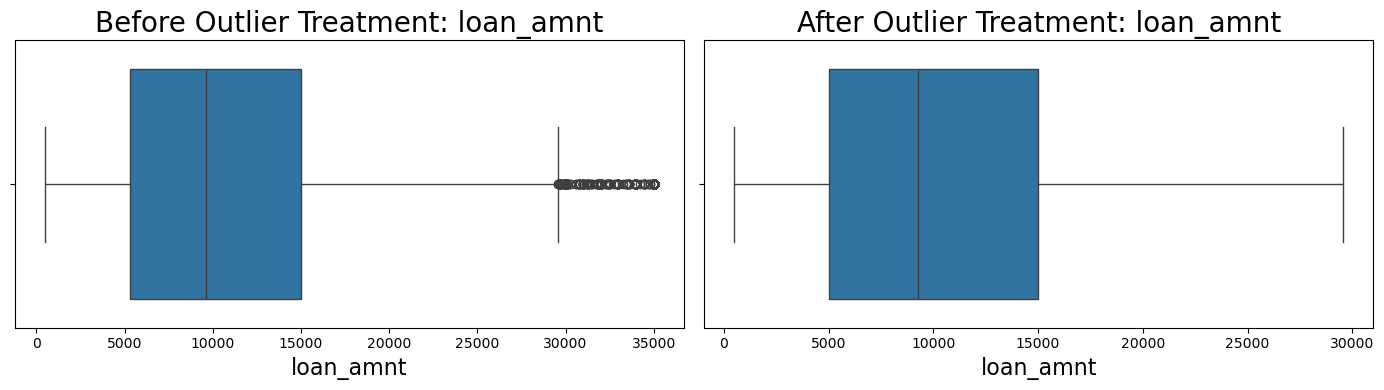

Processing column: funded_amnt

IQR bounds for funded_amnt: {'q1': 5000.0, 'q3': 14050.0, 'iqr': 9050.0, 'lower_bound': -8575.0, 'upper_bound': 27625.0}

IQR Analysis for 'funded_amnt':
{'q1': 5000.0, 'q3': 14050.0, 'iqr': 9050.0, 'lower_bound': -8575.0, 'upper_bound': 27625.0}

Rows before outlier treatment: 37489
Rows after outlier treatment: 37327
Percentage of rows removed: 0.43%



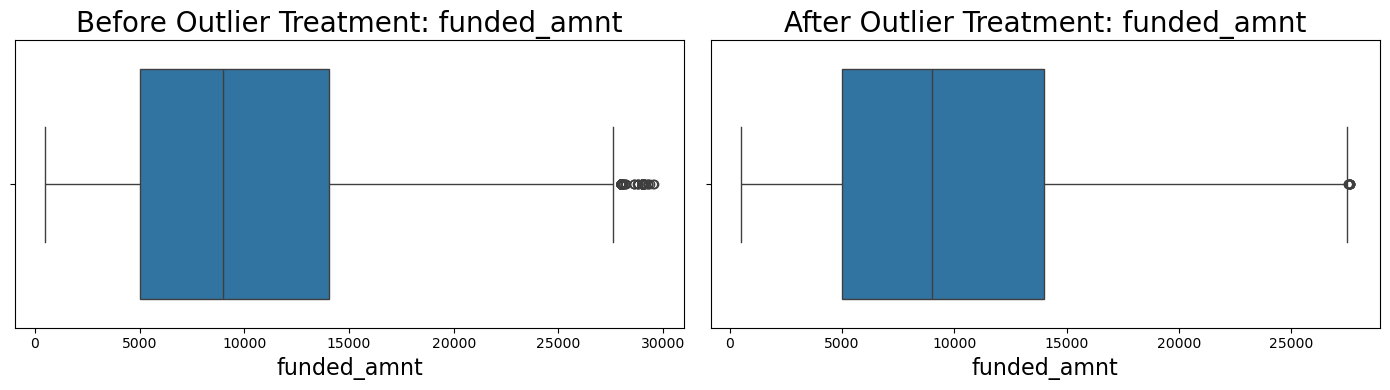

Processing column: funded_amnt_inv

IQR bounds for funded_amnt_inv: {'q1': 4975.0, 'q3': 13200.0, 'iqr': 8225.0, 'lower_bound': -7362.5, 'upper_bound': 25537.5}

IQR Analysis for 'funded_amnt_inv':
{'q1': 4975.0, 'q3': 13200.0, 'iqr': 8225.0, 'lower_bound': -7362.5, 'upper_bound': 25537.5}

Rows before outlier treatment: 37327
Rows after outlier treatment: 37225
Percentage of rows removed: 0.27%



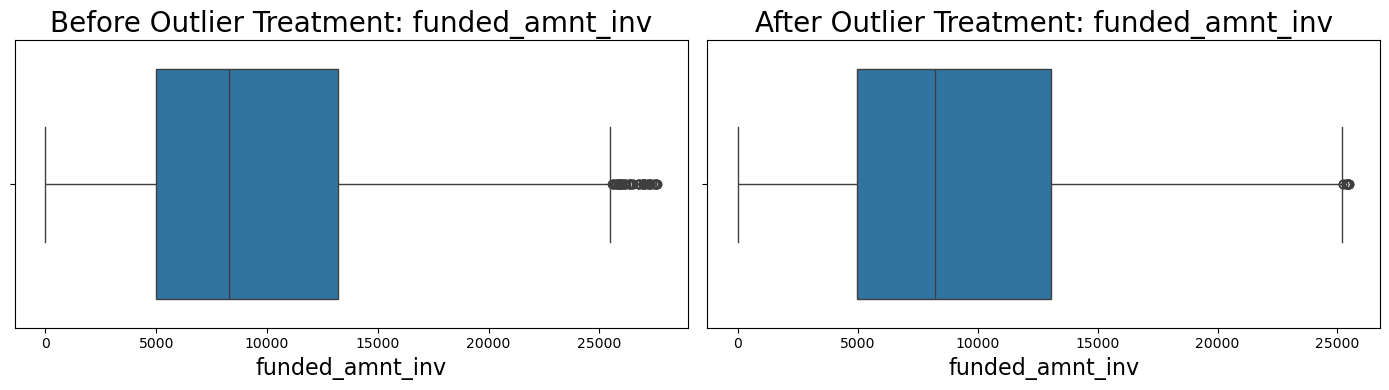

Processing column: int_rate

IQR bounds for int_rate: {'q1': 8.9, 'q3': 14.26, 'iqr': 5.359999999999999, 'lower_bound': 0.8600000000000012, 'upper_bound': 22.299999999999997}

IQR Analysis for 'int_rate':
{'q1': 8.9, 'q3': 14.26, 'iqr': 5.359999999999999, 'lower_bound': 0.8600000000000012, 'upper_bound': 22.299999999999997}

Rows before outlier treatment: 37225
Rows after outlier treatment: 37163
Percentage of rows removed: 0.17%



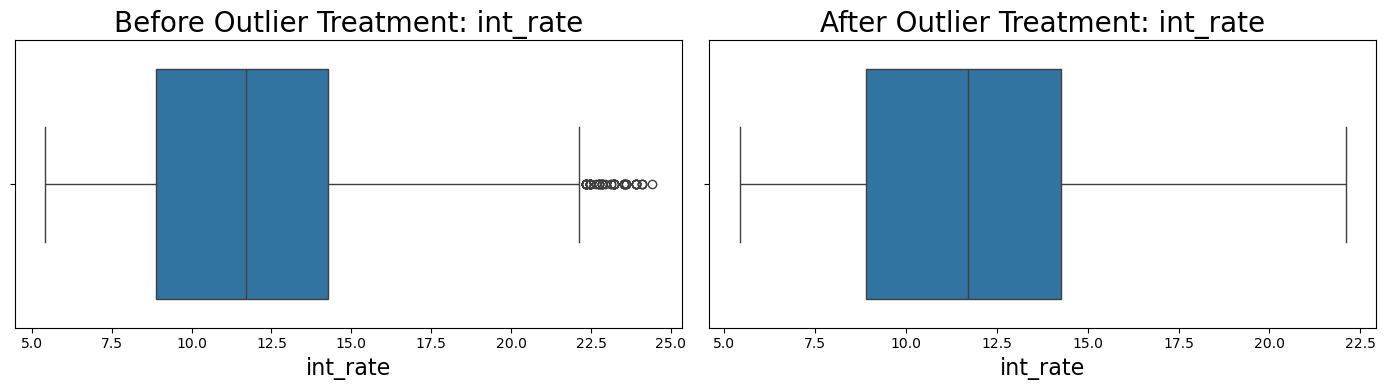

Processing column: installment

IQR bounds for installment: {'q1': 162.87, 'q3': 401.87, 'iqr': 239.0, 'lower_bound': -195.63, 'upper_bound': 760.37}

IQR Analysis for 'installment':
{'q1': 162.87, 'q3': 401.87, 'iqr': 239.0, 'lower_bound': -195.63, 'upper_bound': 760.37}

Rows before outlier treatment: 37163
Rows after outlier treatment: 36135
Percentage of rows removed: 2.77%



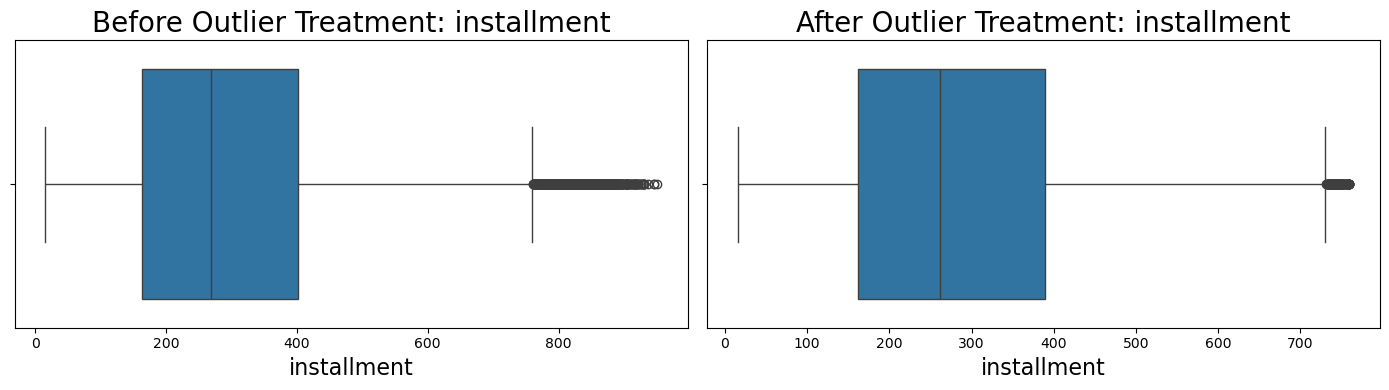

Processing column: annual_inc

IQR bounds for annual_inc: {'q1': 40000.0, 'q3': 78996.0, 'iqr': 38996.0, 'lower_bound': -18494.0, 'upper_bound': 137490.0}

IQR Analysis for 'annual_inc':
{'q1': 40000.0, 'q3': 78996.0, 'iqr': 38996.0, 'lower_bound': -18494.0, 'upper_bound': 137490.0}

Rows before outlier treatment: 36135
Rows after outlier treatment: 34565
Percentage of rows removed: 4.34%



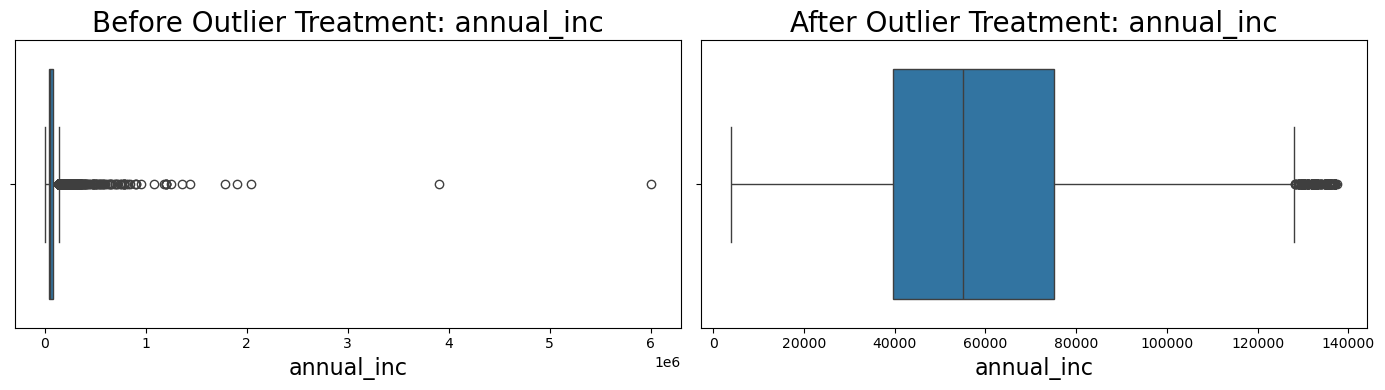

Processing column: dti

IQR bounds for dti: {'q1': 8.29, 'q3': 18.7, 'iqr': 10.41, 'lower_bound': -7.325000000000001, 'upper_bound': 34.315}

IQR Analysis for 'dti':
{'q1': 8.29, 'q3': 18.7, 'iqr': 10.41, 'lower_bound': -7.325000000000001, 'upper_bound': 34.315}

Rows before outlier treatment: 34565
Rows after outlier treatment: 34565
Percentage of rows removed: 0.0%



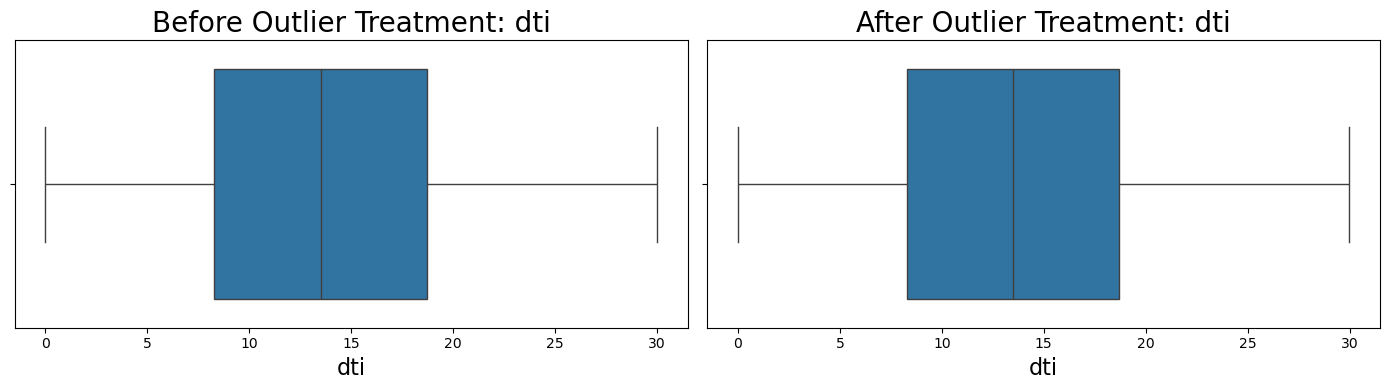

Outlier treatment and visualization complete for all columns.


In [5486]:
# List of columns to perform outlier treatment
outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']

# Loop through each column and apply the functions
for column in outlier_treatment:
    print(f"Processing column: {column}\n")
    
    # IQR bounds calculation
    bounds = calculate_iqr_bounds(loan_data, column)
    print(f"IQR bounds for {column}: {bounds}\n")
    
    # Outlier treatment
    treated_loan_data = treat_outliers(loan_data, column, multiplier=1.5, inplace=False)
    
    # Visualization
    visualize_outliers(loan_data, column, multiplier=1.5)

    # Update 'loan_data' with the treated data (outliers removed) for the next iteration.
    loan_data = treated_loan_data
print("Outlier treatment and visualization complete for all columns.")

##### Summary statistics of numeric columns after outlier treatment

In [5488]:
loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
count,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000
mean,9698.465210,9477.223347,8991.956311,11.722774,283.561790,58869.115884,13.411522
std,5758.780454,5515.248347,5494.059211,3.576761,160.322145,26476.002826,6.671338
min,500.000000,500.000000,0.000000,5.420000,15.690000,4000.000000,0.000000
25%,5000.000000,5000.000000,4850.000000,8.900000,158.770000,39600.000000,8.290000
50%,8500.000000,8400.000000,8000.000000,11.580000,257.780000,54996.000000,13.510000
75%,13250.000000,13000.000000,12000.000000,14.170000,382.740000,75000.000000,18.700000
max,29500.000000,27600.000000,25472.829470,22.110000,759.720000,137481.000000,29.990000


---

## 3. Data Analysis

In this analysis, the primary objective is to identify patterns and variables that are strong indicators of loan defaults. To achieve this, we are adopting a structured approach to univariate and bivariate analyses, ensuring our focus remains aligned with the problem statement. 

#### **Approach for Univariate Analysis**
The univariate analysis will concentrate on exploring the distribution of variables specifically for the subset of data where `loan_status == 'Charged Off'`. By narrowing our analysis to only the defaulted loans, we aim to achieve the following:

1. **Focused Insights**:  
   Understanding the characteristics and behaviors of borrowers who defaulted helps identify key variables contributing to credit loss. This will include:
   - Attributes such as income levels, loan grades, loan purposes, etc., that are disproportionately associated with defaults.
   - Identifying patterns unique to defaulters without noise from non-defaulted loans.

2. **Alignment with Business Objective**:  
   Since the goal is to minimize credit loss by identifying risky borrowers, analyzing only the `Charged-Off` loans ensures the insights are directly applicable to reducing defaults.

3. **Efficiency and Precision**:  
   Filtering the dataset for defaulted loans eliminates the influence of irrelevant data points (`Fully Paid` and `Current` loans), making the analysis more focused and actionable.

#### **Transition to Bivariate Analysis**
In the subsequent bivariate analysis, the focus will shift to analyzing the entire dataset. This step will compare the characteristics of defaulters (`Charged-Off`) against non-defaulters (`Fully Paid`) to identify significant differences. This dual-layered approach ensures a comprehensive understanding of the factors influencing loan repayment behavior.

#### **Rationale for the Analysis:**
This approach provides a **targeted and comparative perspective**, allowing us to:
- Derive actionable insights from defaulted loans in univariate analysis.
- Gain a broader understanding of what distinguishes defaulters from non-defaulters in bivariate analysis.

---

This methodology ensures that our findings are relevant, precise, and aligned with the business goal of mitigating credit loss.

In [5491]:
# Data overview
display(loan_data.head())
display(loan_data.info())
display(loan_data.describe())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec_bankruptcies,issue_y,issue_m,issue_q,loan_paid,loan_amnt_bucket,funded_amnt_bucket,int_rate_bucket,annual_inc_bucket,dti_bucket
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,10,RENT,...,0.0,2011,12,4,Yes,5K - 10K,5K - 10K,10-15%,0 - 40k,Very High
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,0,RENT,...,0.0,2011,12,4,No,0 - 5K,0 - 5K,15-20%,0 - 40k,Very Low
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,10,RENT,...,0.0,2011,12,4,Yes,0 - 5K,0 - 5K,15-20%,0 - 40k,Low
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,10,RENT,...,0.0,2011,12,4,Yes,10K - 15K,10K - 15K,10-15%,40k - 50k,Very High
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,3,RENT,...,0.0,2011,12,4,Yes,5K - 10K,5K - 10K,5-10%,0 - 40k,Low


<class 'pandas.core.frame.DataFrame'>
Index: 34565 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             34565 non-null  float64       
 1   funded_amnt           34565 non-null  float64       
 2   funded_amnt_inv       34565 non-null  float64       
 3   term                  34565 non-null  int64         
 4   int_rate              34565 non-null  float64       
 5   installment           34565 non-null  float64       
 6   grade                 34565 non-null  object        
 7   sub_grade             34565 non-null  object        
 8   emp_length            34565 non-null  int64         
 9   home_ownership        34565 non-null  object        
 10  annual_inc            34565 non-null  float64       
 11  verification_status   34565 non-null  object        
 12  issue_d               34565 non-null  datetime64[ns]
 13  loan_status          

None

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,pub_rec_bankruptcies,issue_y,issue_m,issue_q
count,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000,34565,34565.000000,34565.000000,34565.000000,34565.000000,34565.000000
mean,9698.465210,9477.223347,8991.956311,41.595718,11.722774,283.561790,4.979951,58869.115884,2010-10-19 15:33:29.396788736,13.411522,0.045046,2010.293968,7.087487,2.685809
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,5000.000000,5000.000000,4850.000000,36.000000,8.900000,158.770000,2.000000,39600.000000,2010-05-01 00:00:00,8.290000,0.000000,2010.000000,4.000000,2.000000
50%,8500.000000,8400.000000,8000.000000,36.000000,11.580000,257.780000,4.000000,54996.000000,2011-01-01 00:00:00,13.510000,0.000000,2011.000000,7.000000,3.000000
75%,13250.000000,13000.000000,12000.000000,36.000000,14.170000,382.740000,9.000000,75000.000000,2011-07-01 00:00:00,18.700000,0.000000,2011.000000,10.000000,4.000000
max,29500.000000,27600.000000,25472.829470,60.000000,22.110000,759.720000,10.000000,137481.000000,2011-12-01 00:00:00,29.990000,2.000000,2011.000000,12.000000,4.000000
std,5758.780454,5515.248347,5494.059211,10.148308,3.576761,160.322145,3.586294,26476.002826,NaN,6.671338,0.208103,0.885010,3.409863,1.103564


#### **Data Understanding: Overall Default Rate is 14%**

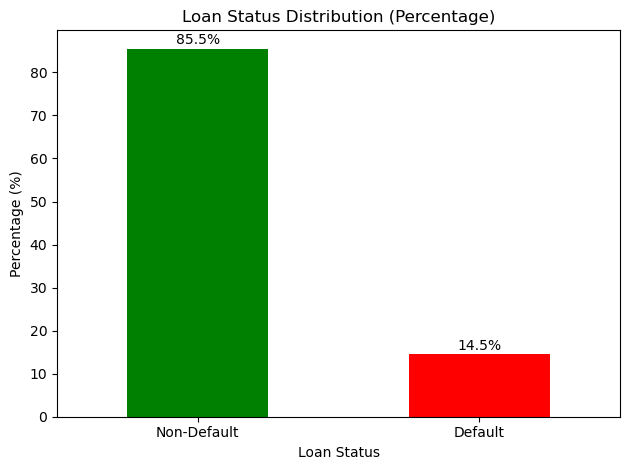

In [5493]:
# Calculate the percentage of each loan status
status_counts = loan_data['loan_status'].value_counts()
status_percentages = round(100 * (status_counts / len(loan_data)), 1)

# Plot the bar chart
ax = status_percentages.plot(kind='bar', color=['green', 'red'])
plt.title("Loan Status Distribution (Percentage)")
plt.xlabel("Loan Status")
plt.ylabel("Percentage (%)")
ticks = range(len(status_percentages))
plt.xticks(ticks=ticks, labels=['Non-Default', 'Default'], rotation=0)
plt.tight_layout()

# Annotate percentages on top of the bars
for i, v in enumerate(status_percentages):
    ax.annotate(f'{v}%', (i, v), ha='center',  va='bottom', fontsize=10, 
                color='black', xytext=(0, 1), textcoords='offset points')

# Show the plot
plt.show()

### **3.1 Univariate Analysis**
(Including Segmented Univariate Analysis on Key Variables)

#### Variables Selected for Univariate Analysis of Charged-Off Loans
    1. Categorical Variables
        1. Unordered Categorical Variables
            1. Address State (addr_state)         
            2. Home Ownership (home_ownership)
            3. Loan Purpose (purpose)
            4. Loan Paid (loan_paid)
            5. Verification Status (verification_status)
        2. Ordered Categorical Variables
            1. Grade (grade)
            2. Sub Grade (sub_grade)
            3. Employee Length (emp_length)
            4. Term (term)
            5. Loan Amount Bucket (loan_amnt_bucket)
            6. Funded Amount Bucket (funded_amnt_bucket)
            7. Ineterst Rate Bucket (int_rate_bucket)
            8. Annual Income Bucket (annual_inc_bucket)
            9. Debt-To-Income Bucket (dti_bucket)
            10. Issue Year/Month/Quarter (issue_y, issue_m, issue_q)
    2. Quantitative Variables
        1. Loan Amount (loan_amnt)
        2. Funded Amount (funded_amnt) 
        3. Interest Rate (int_rate)
        4. Annual Income (annual_inc)
        5. Debt-To-Income Ratio (dti)
        6. Installments (installment)

#### **3.1.1 Categorical Variables**

In [5497]:
def plot_categorical_variable(df, column, ordered=False, filter_column=None, filter_value=None):
    """
    Plot a categorical variable as a bar chart or count plot, with custom colors and percentage annotations.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data to be analyzed.
        column (str): Name of the categorical column to visualize.
        ordered (bool, optional): If True, the categories are ordered based on frequency. Default is False.
        filter_column (str, optional): Column name to apply a filter on. Default is None.
        filter_value (any, optional): Value used to filter the `filter_column`. Default is None.
        
    Returns:
        None: The function displays a count plot.
    """
    plt.figure(figsize=(12, 6))

    # Filter data if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_df = df[df[filter_column] == filter_value]
    else:
        filtered_df = df

    # Order categories by frequency if ordered=True
    if ordered:
        sorted_categories = filtered_df[column].value_counts().index
        ax = sns.countplot(data= filtered_df, x=column, order=sorted_categories, palette='viridis')
    else:
        ax = sns.countplot(data= filtered_df, x=column, palette='viridis')

    # Annotate count on each bar
    for p in ax.patches:   
        if column == 'addr_state':
            rotation=30
        else:
            rotation=0   
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    rotation=rotation, xytext=(0, 1), textcoords='offset points')
    
    # Adjust plot aesthetics
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Default Count", fontsize=12)
    plt.xticks(rotation=30, fontsize=10)
    plt.tight_layout()
    plt.show()

#### 3.1.1.1 Unordered Categorical Variables

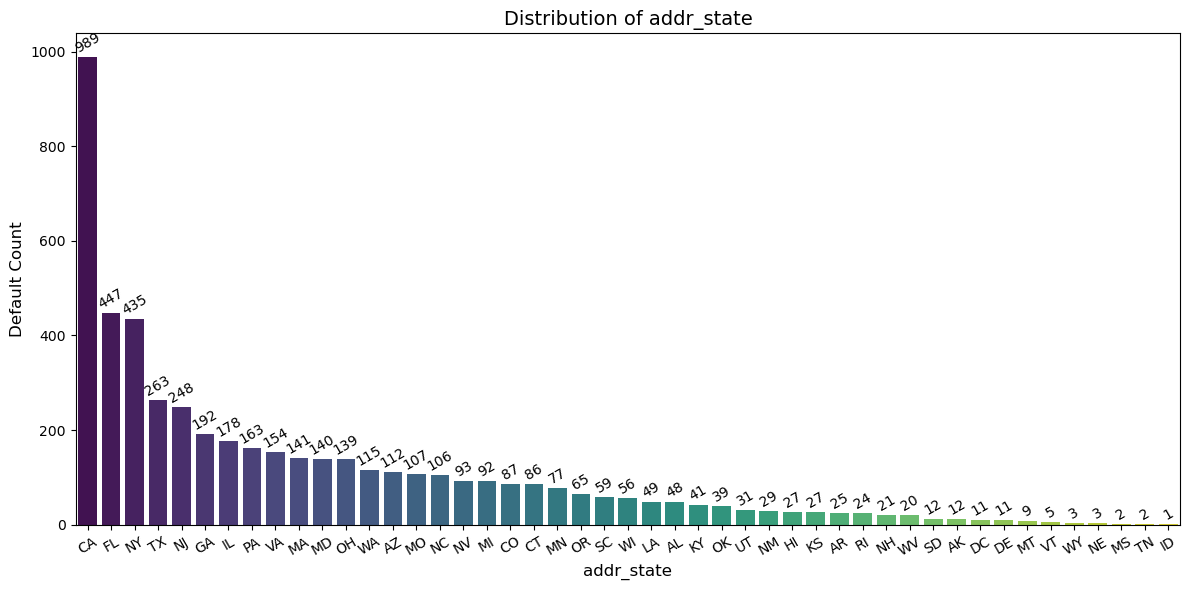

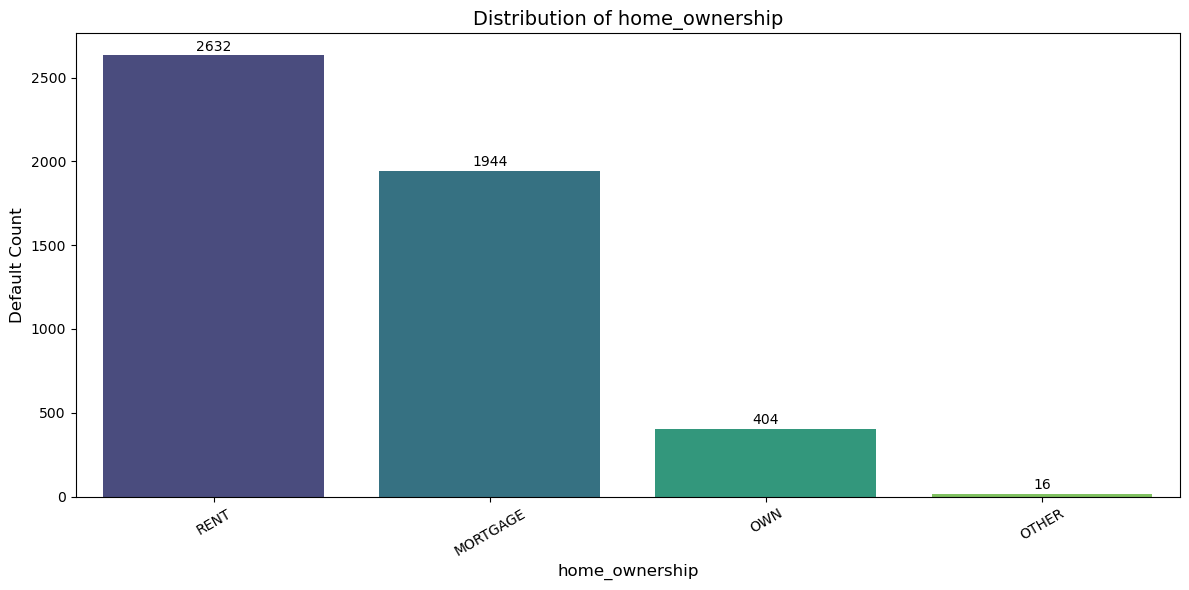

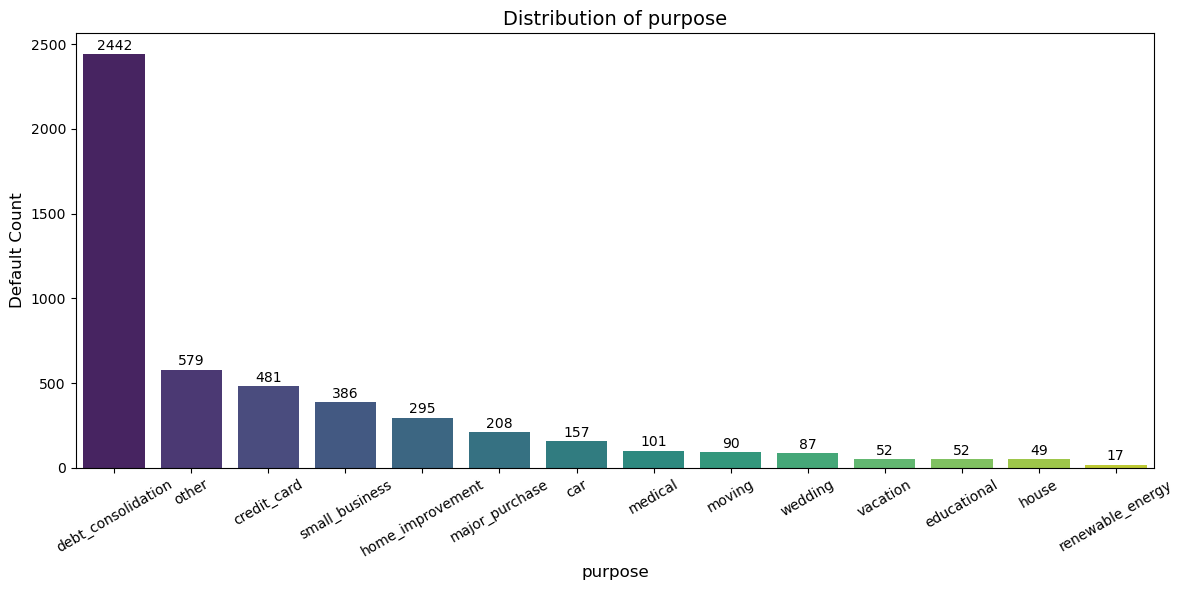

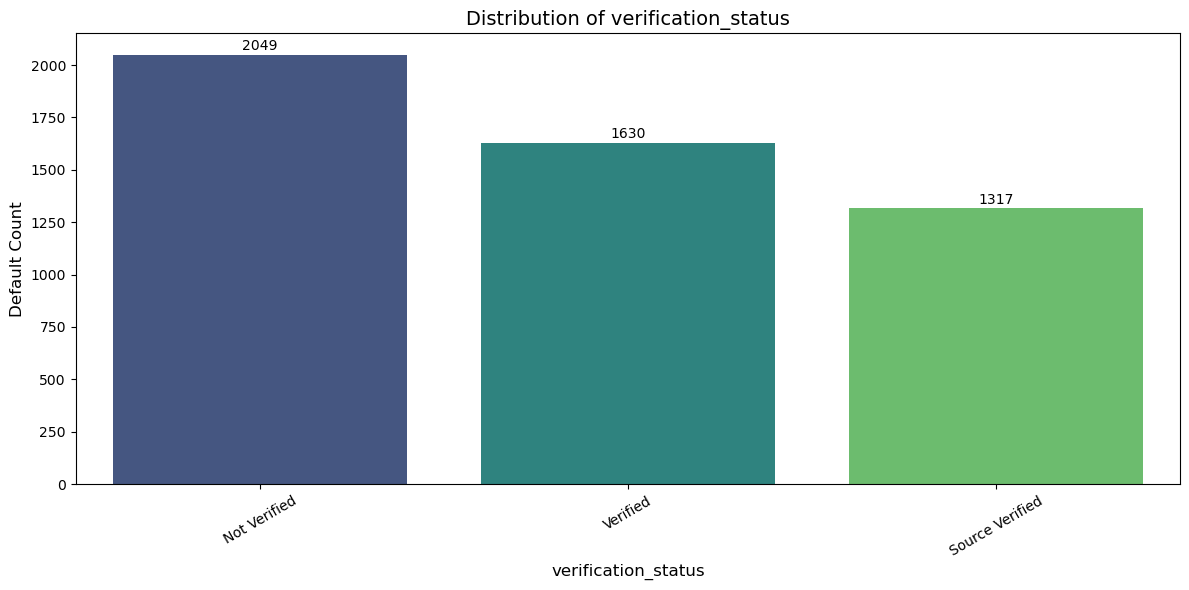

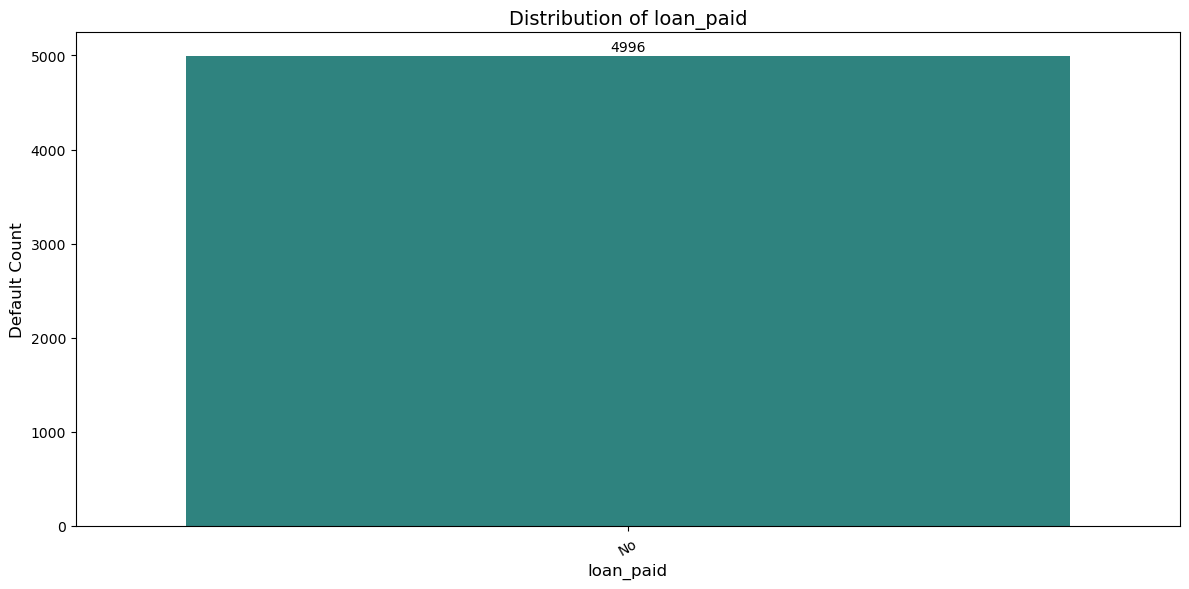

In [5499]:
for u_cat_var in ['addr_state', 'home_ownership', 'purpose', 'verification_status', 'loan_paid']:
    plot_categorical_variable(
        df = loan_data, 
        column = u_cat_var,
        ordered = True,
        filter_column = 'loan_status',
        filter_value = 'Charged Off'
    )

#### 3.1.1.2 Ordered Categorical Variables

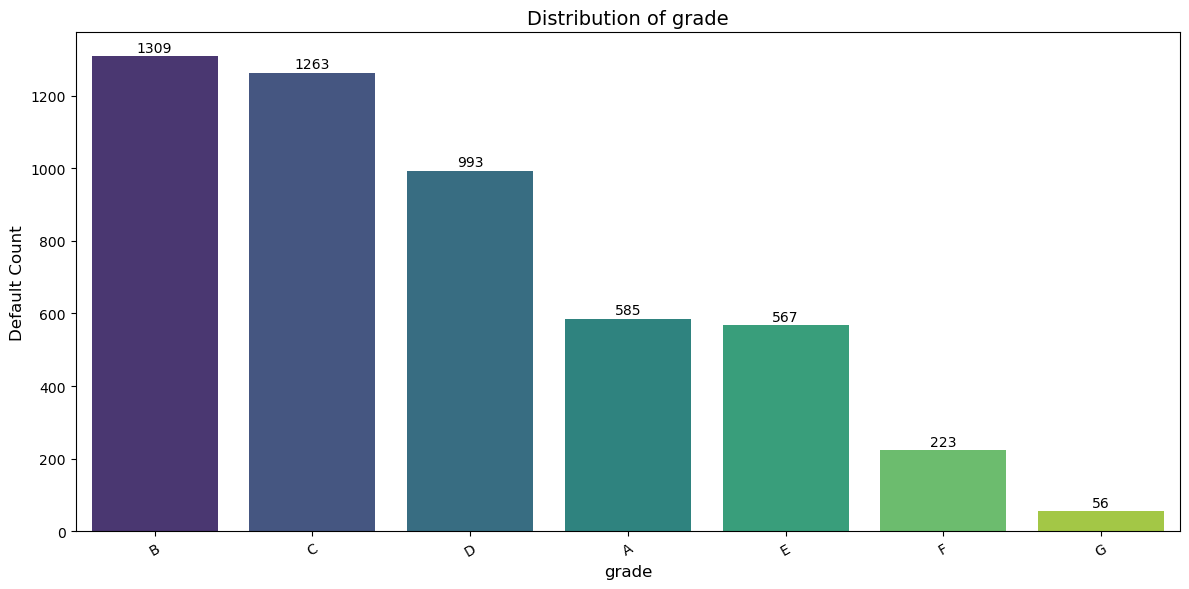

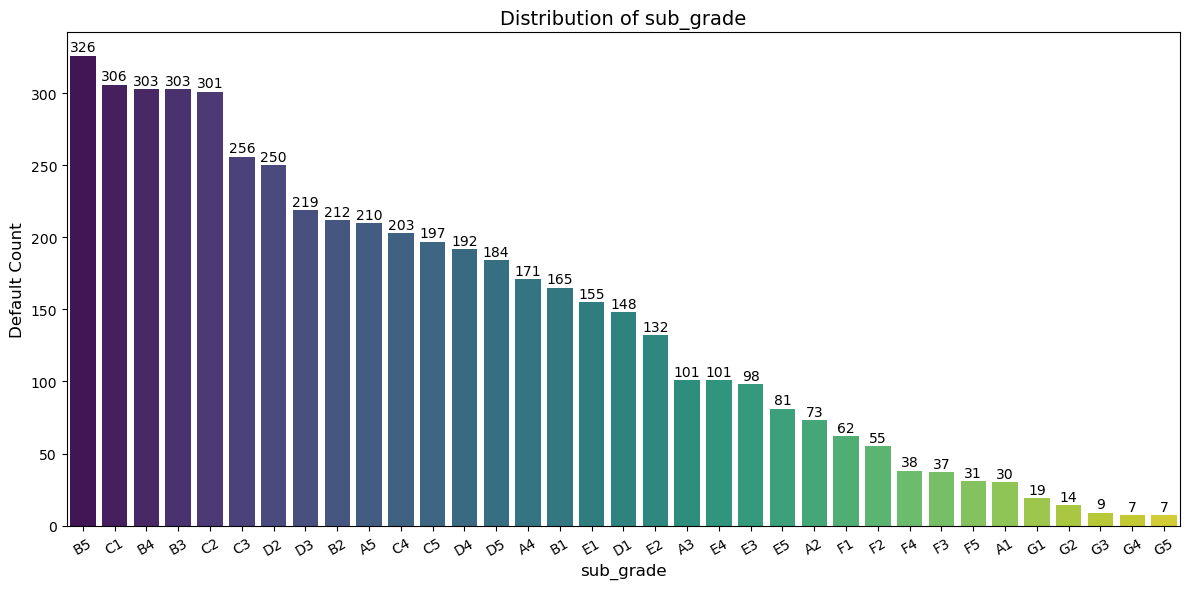

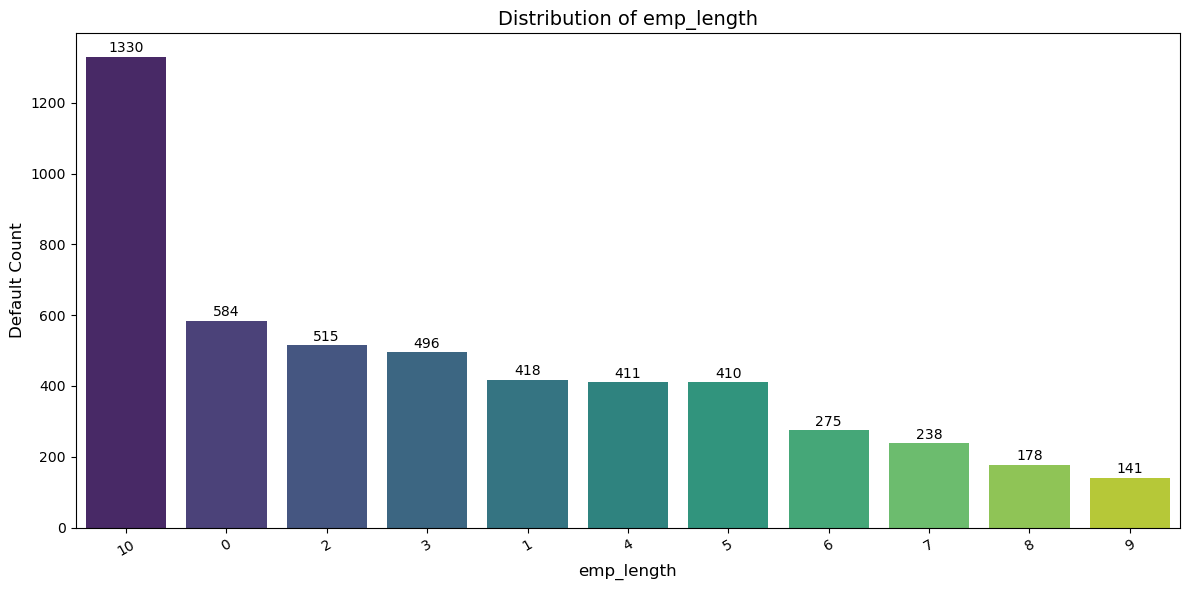

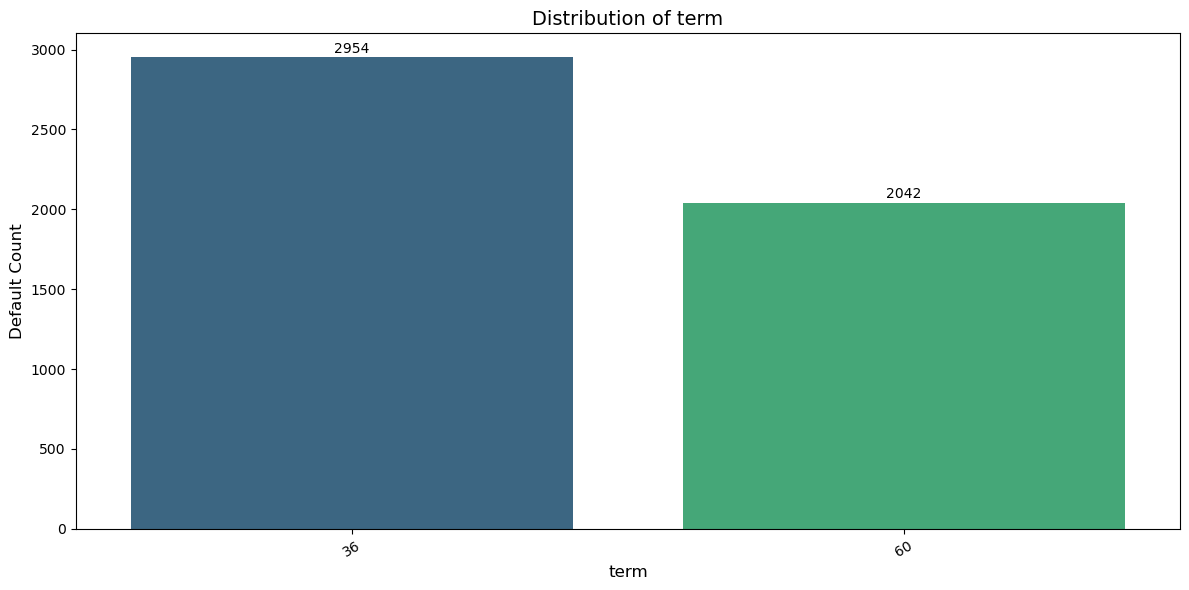

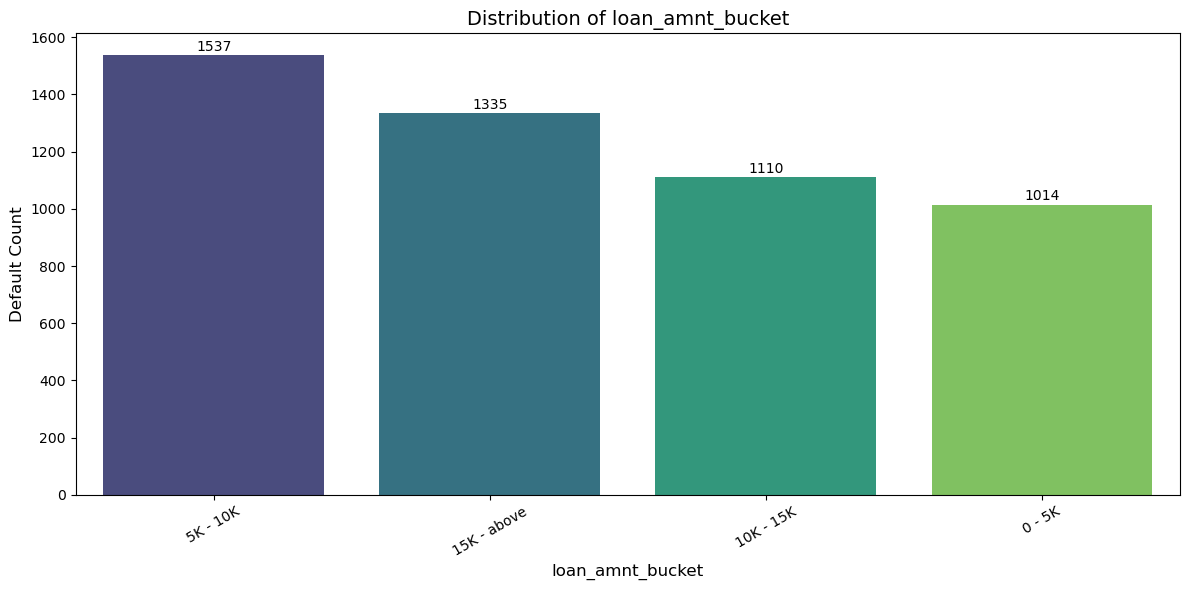

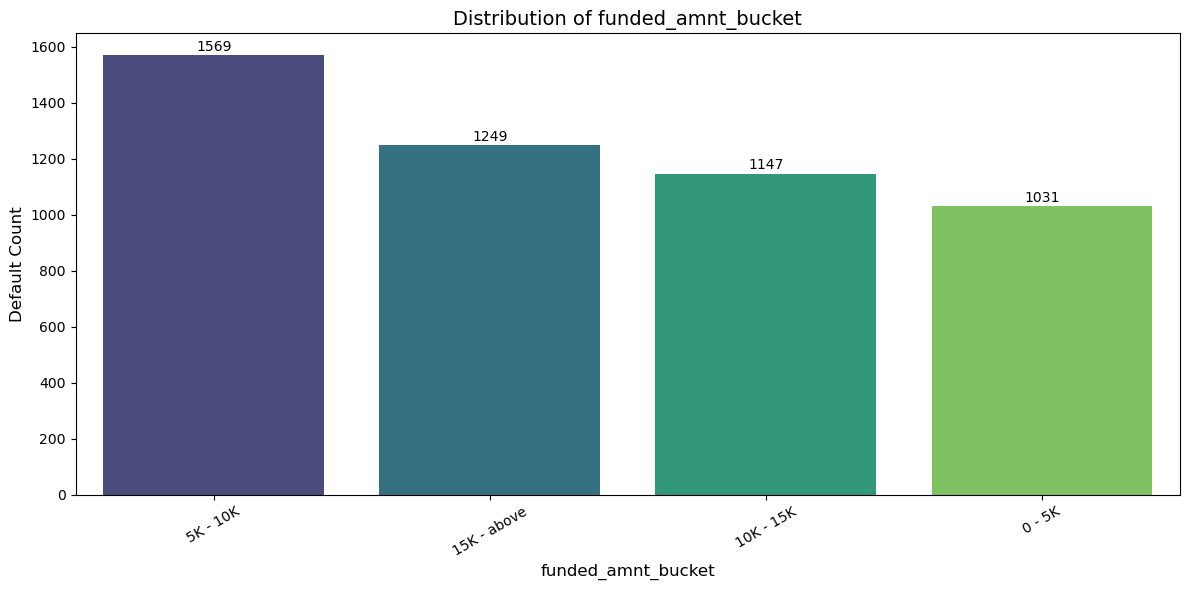

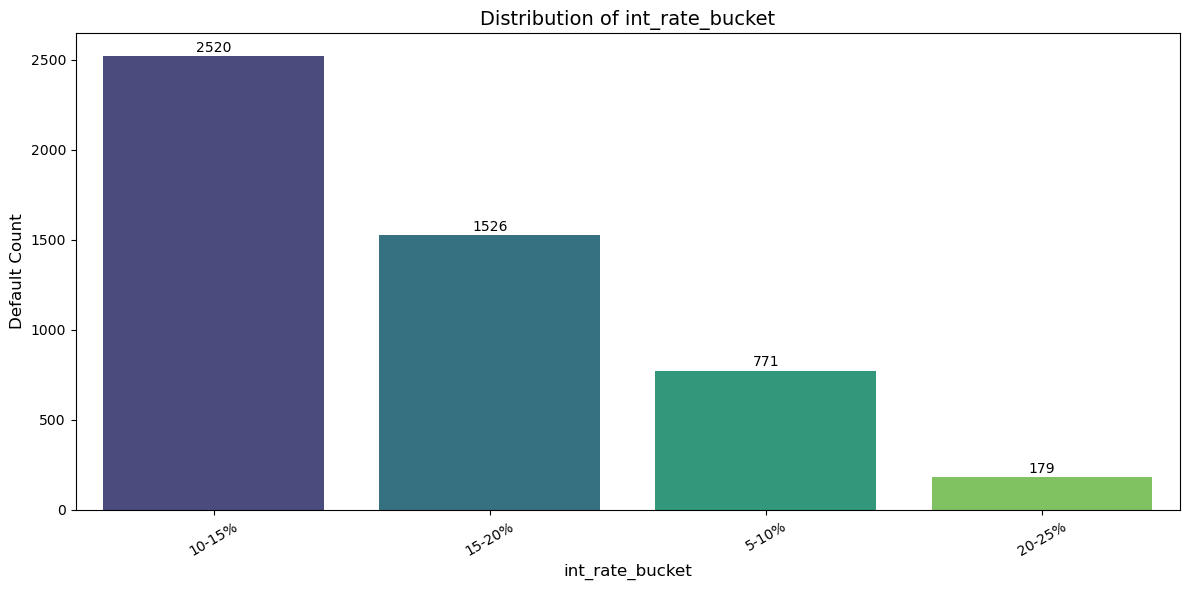

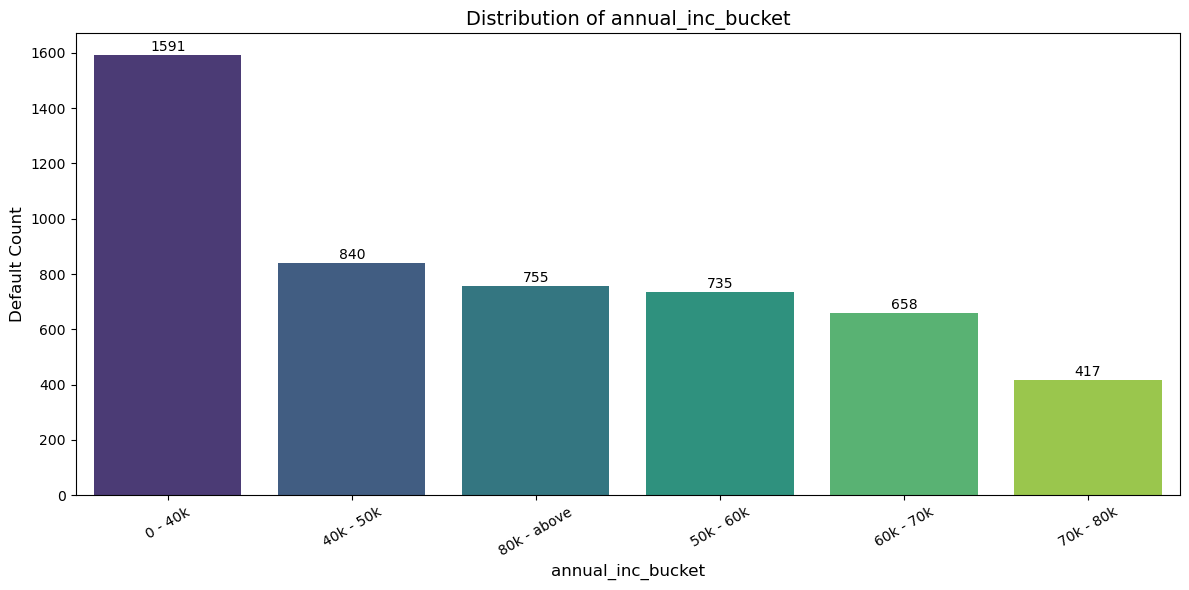

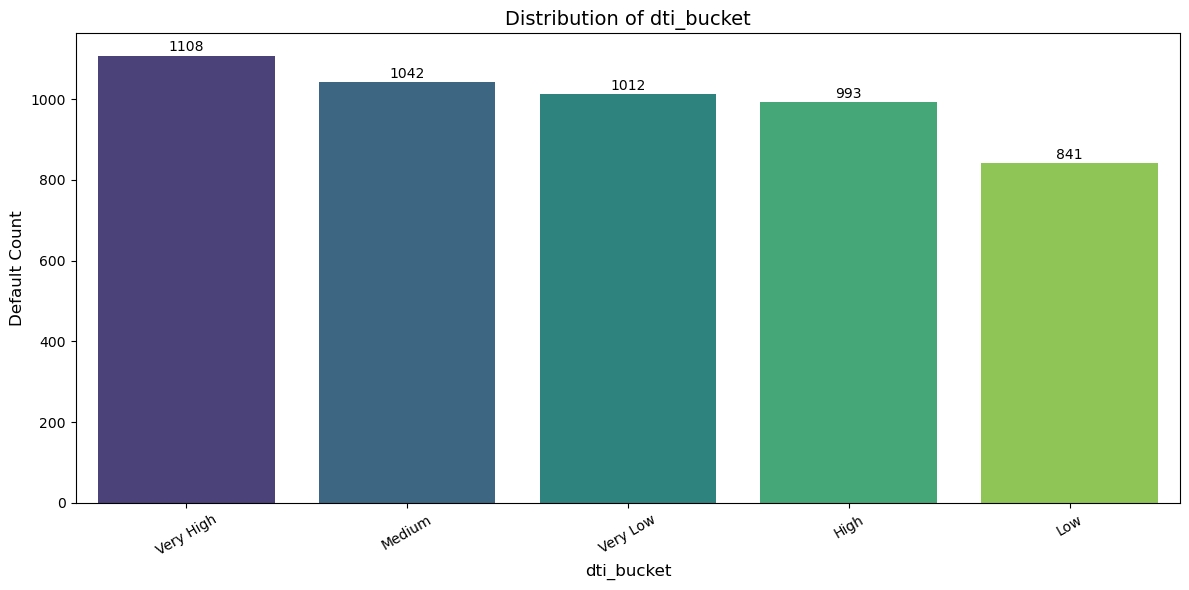

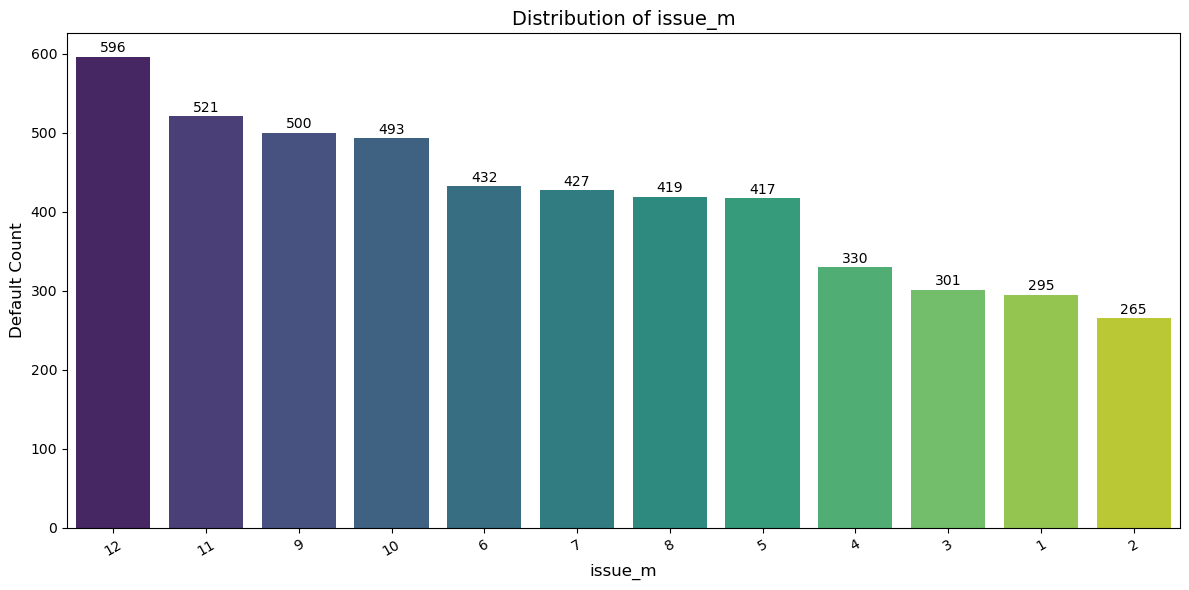

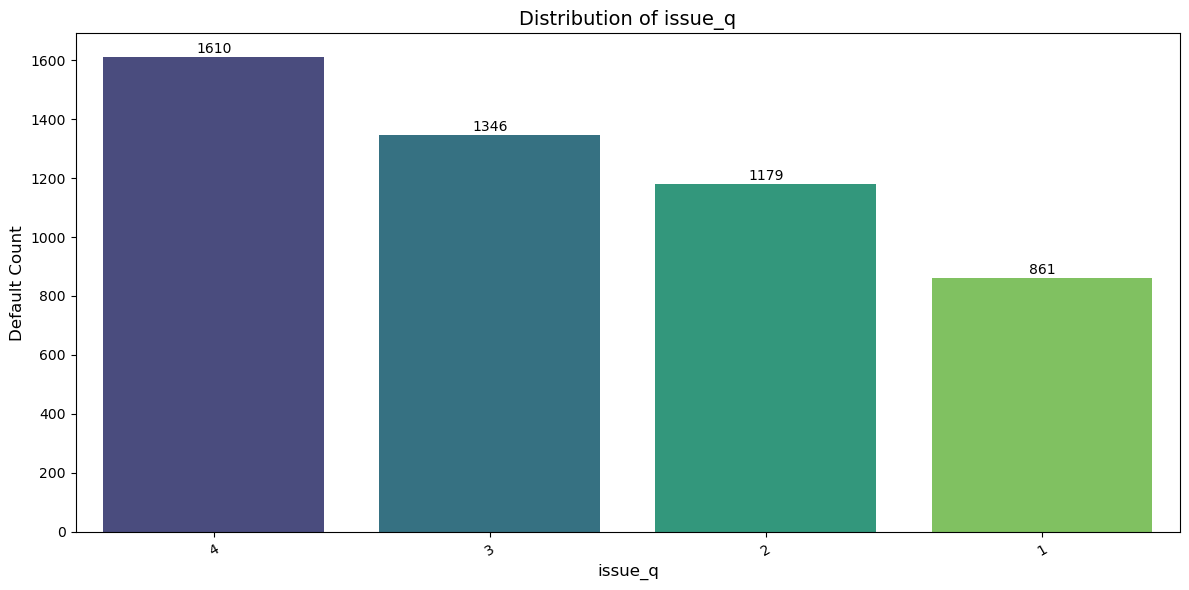

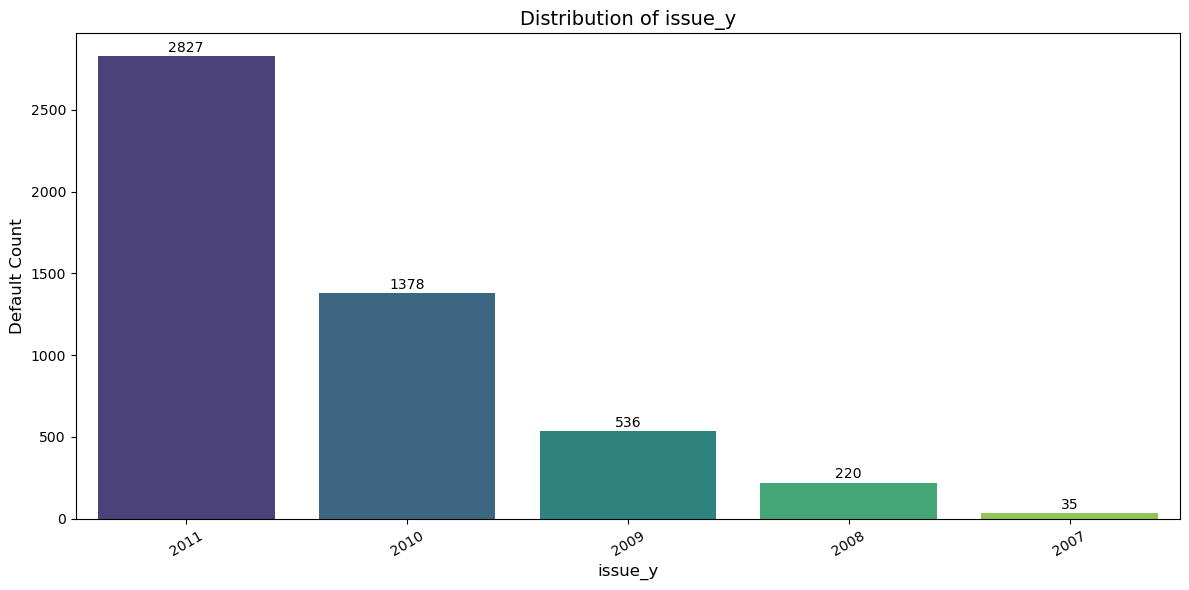

In [5501]:
for o_cat_var in ['grade', 'sub_grade', 'emp_length', 'term', 'loan_amnt_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket', 'dti_bucket',
                 'issue_m', 'issue_q', 'issue_y']:
    plot_categorical_variable(
        df = loan_data, 
        column = o_cat_var,
        ordered=True,
        filter_column = 'loan_status',
        filter_value = 'Charged Off'
    )

### 3.1.2 Quantitative Variable

In [5503]:
# Common Function to plot the distribution of a quantitative variable from a DataFrame.
def plot_quantitative_variable(df, column, bins=30, filter_column=None, filter_value=None):
    """
    Plot a quantitative variable using a histogram and boxplot.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Name of the quantitative column to plot.
        bins (int): Number of bins for the histogram.
        filter_column (str, optional): Column name to apply a filter on. Default is None.
        filter_value (any, optional): Value used to filter the `filter_column`. Default is None.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Filter data if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_df = df[df[filter_column] == filter_value]
    else:
        filtered_df = df
    
    # Histogram
    sns.histplot(filtered_df[column], bins=bins, kde=True, ax=axes[0], color="blue")
    axes[0].set_title(f"Histogram of {column}", fontsize=14)
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel("Density", fontsize=12)
    
    # Boxplot
    sns.boxplot(x=filtered_df[column], ax=axes[1], color="green")
    axes[1].set_title(f"Box Plot of {column}", fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)
    
    plt.tight_layout()
    plt.show()


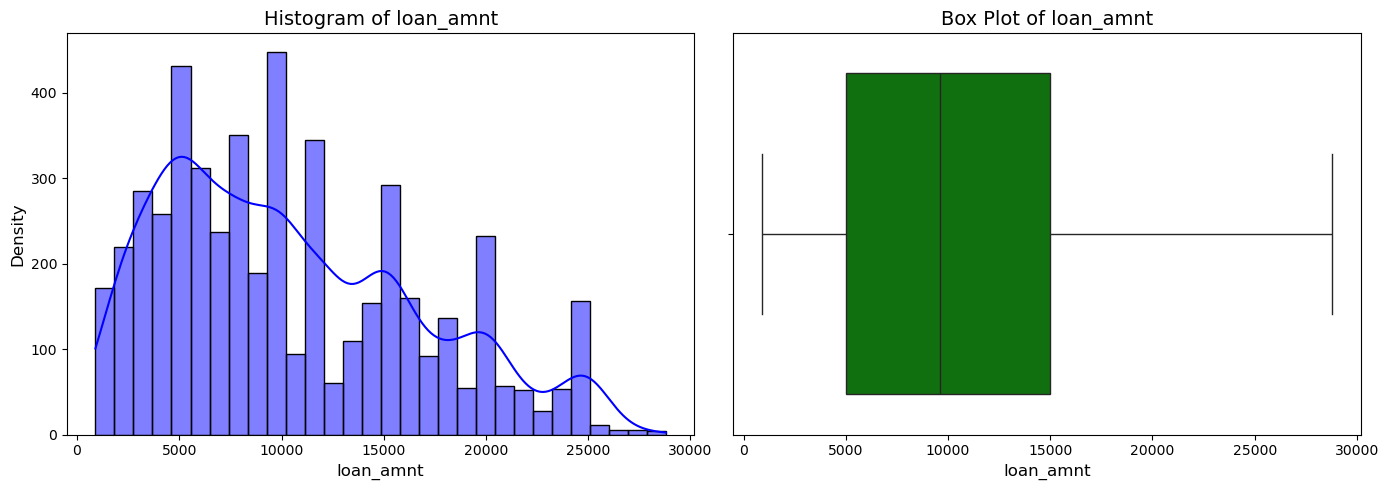

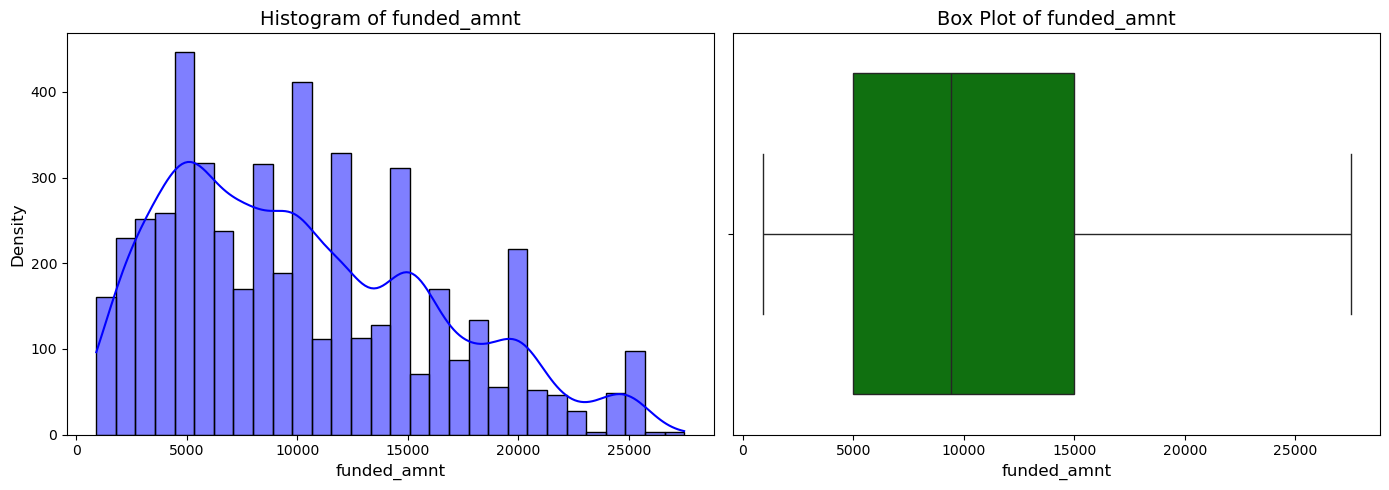

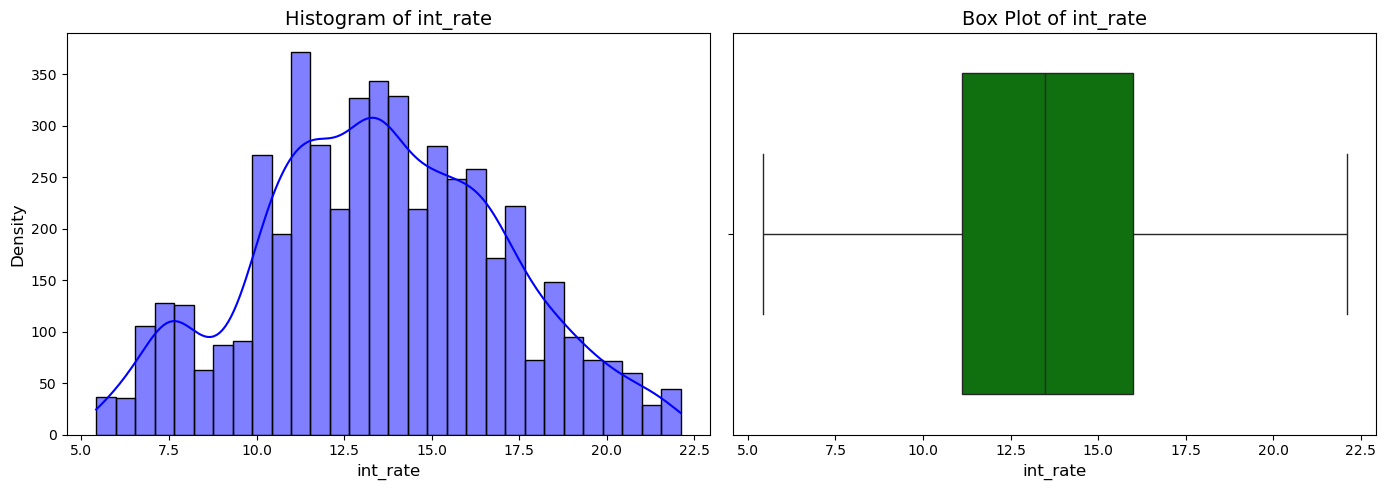

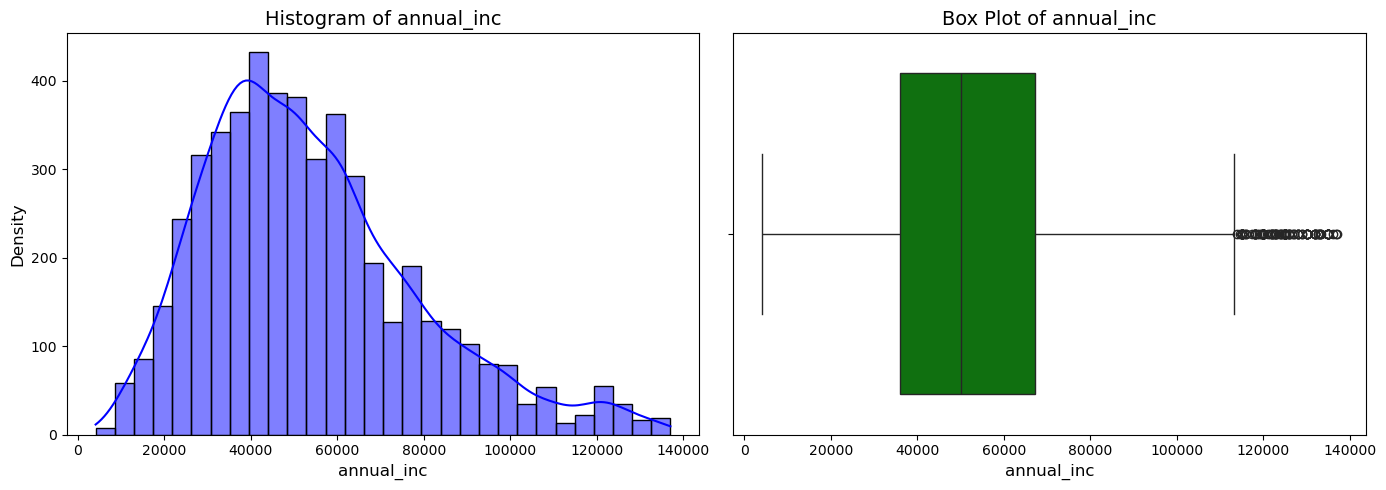

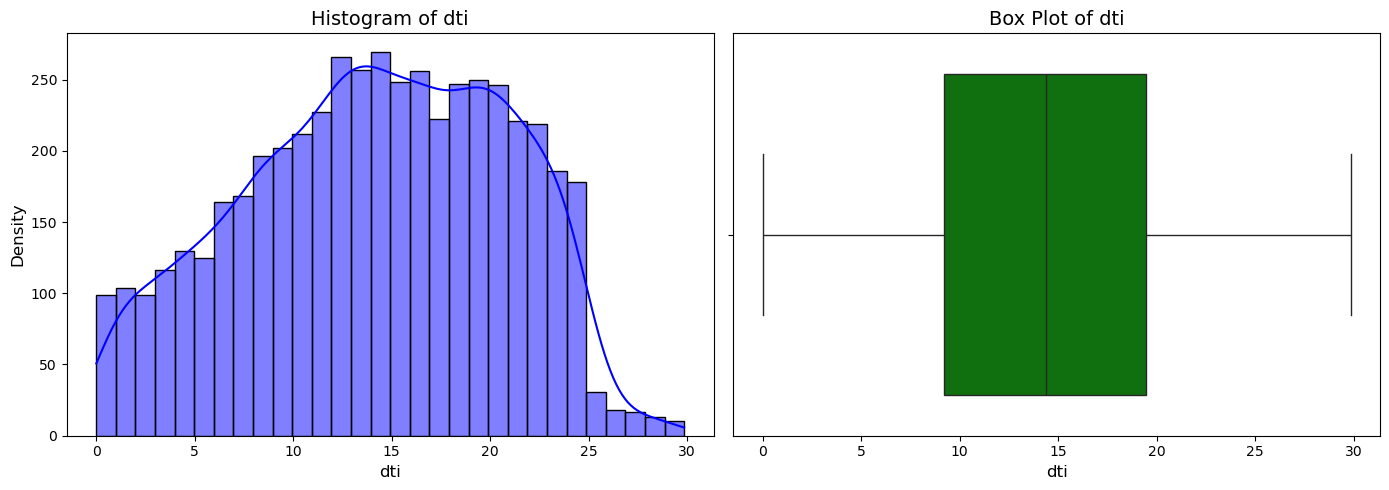

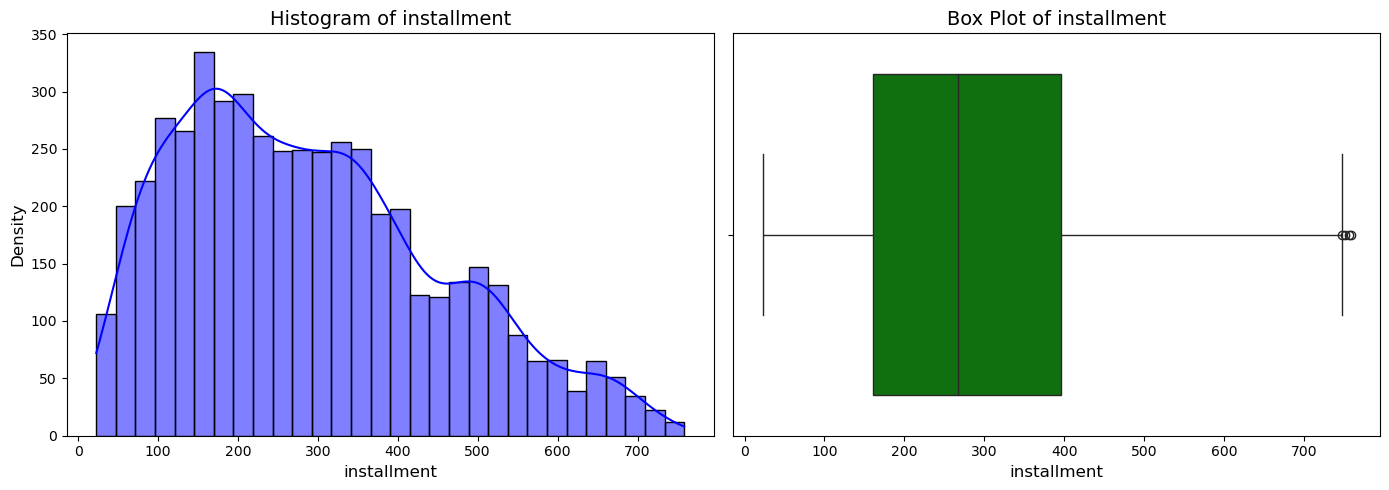

In [5504]:
for quantitative_var in ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'installment']:
        plot_quantitative_variable(
        df = loan_data, 
        column = quantitative_var,
        filter_column = 'loan_status',
        filter_value = 'Charged Off'
    )

## **Key Insights and Observations from Univariate Analysis**

### **Unordered Categorical Variables**
1. California (CA) recorded the highest number of "Default" loan applicants, totaling 989, highlighting a significant risk area for the lending company. To address this, the company could introduce tailored loan products, enhance financial literacy programs, or implement dynamic interest rates to proactively mitigate risks.
2. The majority of "Charged Off" loan applicants, amounting to 2,632 individuals, resided in rented accommodations. The company could assess the financial stability of renters more thoroughly by incorporating additional parameters, such as rental expenses and savings, into the credit evaluation process.
3. A significant number of "Charged Off" loan applicants, totaling 2,442 individuals, cited debt consolidation as their primary loan purpose. This trend signals a potential area of concern, suggesting that loans intended for consolidating debt may carry higher risks of default. The company should consider implementing stricter approval criteria for debt consolidation loans, such as assessing the applicant's overall debt-to-income ratio, evaluating the underlying reasons for debt accumulation, and offering financial counseling to ensure borrowers are better equipped to manage their finances.
4. Loans marked as 'Not Verified' represent the largest portion of charged-off loans, totaling 2,049 applicants. This indicates a potential gap in the verification process that could be contributing to higher default rates. To reduce the risk of charged-offs, the company should strengthen the income verification process, ensure thorough checks on financial documentation, and implement more rigorous criteria for loan approval.
5. A considerable portion of loan participants, totaling 4,996 individuals, defaulted on their loans, indicating a critical risk for the lending company. To mitigate the risk associated with loan defaults, the company should adopt a more comprehensive credit risk assessment process, utilizing advanced predictive models and incorporating alternative data sources. Additionally, they could implement risk-based pricing, offering higher interest rates to higher-risk borrowers while incentivizing timely repayment with rewards or lower rates for those who demonstrate consistent repayment behavior.

### **Ordered Categorical Variables**

1. Credit Grade B had the highest number of loan defaults, with 1,309 applicants, closely followed by Grade C with 1,263 applicants. This suggests that borrowers in these credit grades are at a higher risk of default, indicating the need for enhanced credit evaluation processes for these groups.  

2. Sub-grade B5 experienced the highest default rate, with 326 loan defaults. This granular level of credit segmentation highlights specific risk areas within broader credit grades, requiring targeted interventions.  

3. Applicants employed for over 10 years had the highest number of loan defaults, totaling 1,330. This suggests that a long employment history does not always correlate with loan repayment ability, and additional financial assessments may be necessary.  

4. Short-term loans of 36 months were the most popular among defaulters, with 2,954 cases. This indicates that shorter repayment durations may pose challenges for borrowers, potentially due to higher monthly payment obligations.  

5. Loan amounts between 5,000 and 10,000 USD had the highest defaults, with 1,537 applicants. This bucket may represent a sweet spot for moderate-risk loans that require careful scrutiny during approval.  

6. Funded loans in the 5,000 – 10,000 USD range also saw the most defaults, with 1,569 cases. The alignment with the loan amount bucket underscores the need for thorough funding evaluations within this range.  

7. The 10–15% interest rate bucket accounted for the most defaults, with 2,520 cases. This suggests that mid-range interest rates may not significantly deter risky borrowers, necessitating more dynamic interest structuring.  

8. Borrowers with annual incomes between 0 and 40,000 USD showed the highest default rate, with 1,591 cases. This emphasizes the need to carefully evaluate applicants with lower income levels and offer tailored repayment options.  

9. Borrowers with very high DTI ratios experienced 1,108 defaults, signaling the importance of stricter DTI thresholds in the loan approval process to minimize risk.  

10. The fourth quarter had the highest defaults, with 1,610 cases, particularly in December, which saw 596 defaults. This trend could be linked to financial stress during the holiday season. The year 2011 recorded 2,827 defaults, a significant increase (105%) compared to 1,378 in 2010, possibly reflecting broader economic challenges.  

**Recommendations:**  
1. Implement stricter credit policies for Grades B and C, as well as Sub-grade B5, to address high-risk segments effectively.  
2. Assess loan affordability rigorously for short-term loans and applicants with long employment histories to identify potential repayment challenges.  
3. Reassess income and DTI thresholds, particularly for applicants with lower incomes or very high DTI ratios, to minimize approval of high-risk loans.
4. Evaluate seasonal patterns in defaults, especially during the fourth quarter, and introduce tailored financial products or repayment plans for borrowers facing holiday season pressures.  
5. Leverage data insights from defaults in 2011 to refine risk assessment models and mitigate similar risks in future economic downturns.

### **Quantitative Variables**
1. Among charged-off loans, most loan amounts fall between 5,000 and 15,000 USD, suggesting that moderate-sized loans are more prone to default. Only a small number of charged-off loans exceed 25,000 USD, indicating that higher loan amounts are less frequently associated with defaults or are approved with greater scrutiny. The typical charged-off loan amount is around 10,000 USD, but there is significant variation in loan sizes among defaulters.
2. Most charged-off loans have funded amounts between 5,000 and 15,000 USD, indicating increased default risk in this range. Funded amounts exceeding 25,000 USD are less commonly associated with defaults, possibly due to stricter approval processes or lower borrower demand. The typical funded amount for charged-off loans is approximately 10,000 USD.
3. The majority of charged-off loans have lower interest rates, with most defaults occurring in the 10-15% range, while loans with rates above 20% are less common among defaults.
4. Borrowers with annual incomes between 0 and 40,000 USD experienced the highest default rates, indicating that lower-income borrowers are more likely to default; the majority of loans fall within this income range, with a few borrowers earning more than 120,000 USD.
5. The majority of borrowers have lower DTI ratios, falling within the Very Low to Medium categories. Despite this, defaults are more concentrated among borrowers with Very High DTI ratios (above 20), indicating that borrowers with high debt relative to income are at greater risk of default.
6. The majority of charged-off loans have smaller installments, typically ranging from 160 to 400 USD, with a few loans exceeding 600 USD. This suggests that while smaller installments are more common, the higher monthly payments associated with loans over 600 USD may place more financial strain on borrowers, potentially contributing to defaults


**Recommendations:**  
1. Focus on streamlining processes for loans in the 5,000 to 15,000 USD range, as they represent the bulk of applications. For higher loan amounts, implement stricter approval criteria or additional risk assessment measures to ensure borrowers have the capacity to repay.
2. Enhance risk assessment strategies for funded amounts in the 5,000 to 15,000 USD range. Continue stringent approval processes for funded amounts over 25,000 USD. Design repayment options tailored to funded amounts in the high-default range to minimize risks.
3. To improve risk management, refine interest rate strategies based on default trends, strengthen assessments for loans in the 10-15% range, and enhance borrower understanding of how interest rates affect repayments.
4. To reduce default rates, focus on evaluating borrowers with lower incomes more carefully, offer tailored repayment plans to accommodate their financial situations, and consider income segmentation when making lending decisions.
5. To reduce defaults, lenders should focus on borrowers with Very High DTI ratios, as they show a higher likelihood of default. Stricter underwriting criteria should be implemented for borrowers in the High and Very High DTI ranges. Lenders should carefully assess the financial capacity of these borrowers and consider factors such as their income stability, credit history, and other debt obligations.
6. Lenders should closely monitor applicants with monthly installments in 160 to 400 USD range and evaluate their ability to repay, to reduce the risk of defaults.

---

### **3.2 Bivariate Analysis**

#### Variables Selected for Bivariate Analysis Against the Target Variable: Loan Status (loan_status)
    1. Categorical Variables
        1. Unordered Categorical Variables
            1. Home Ownership (home_ownership)
            2. Address State (addr_state)
            3. Loan Purpose (purpose)
            4. Verification Status (verification_status)
        2. Ordered Categorical Variables
            1. Grade (grade)
            2. Sub Grade (sub_grade)
            3. Employee Length (emp_length)
            4. Term (term)
            5. Loan Amount Bucket (loan_amnt_bucket)
            6. Funded Amount Bucket (funded_amnt_bucket)
            7. Ineterst Rate Bucket (int_rate_bucket)
            8. Annual Income Bucket (annual_inc_bucket)
            9. Debt-To-Income Bucket (dti_bucket)
            10. Issue Year/Month/Quarter (issue_y, issue_m, issue_q)
    2. Quantitative Variables
        1. Loan Amount (loan_amnt)
        2. Funded Amount (funded_amnt) 
        3. Interest Rate (int_rate)
        4. Annual Income (annual_inc)
        5. Debt-To-Income Ratio (dti)

In [5512]:
# Common Function for Bivariate Analysis
def bivariate_analysis(df, var1, var2, analysis_type='categorical_vs_categorical'):
    """
    Perform bivariate analysis between two variables based on the specified analysis type.
    
    Parameters:
        df (pd.DataFrame): The dataset containing the variables.
        var1 (str): The first variable to analyze.
        var2 (str): The second variable to analyze.
        analysis_type (str): Type of bivariate analysis. Options are 'categorical_vs_categorical', 
                              'numerical_vs_categorical', 'numerical_vs_numerical'.
    
    Returns:
        None: The function will display plots based on the specified analysis type.
    """
    
    if analysis_type == 'categorical_vs_categorical':
        # Categorical vs Categorical analysis (e.g., Home Ownership vs Loan Status)
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=var1, hue=var2, data=df, palette='Set2')
        
        # Total count of all rows
        total_count = len(df)
        
        # Annotate percentages on each bar
        # Skipping annotations for 'addr_state' and 'sub_grade' to ensure better readability, 
        # as their 50 and 35 categories result in overlapping text and a cluttered visualization.
        if var1 not in ['addr_state', 'sub_grade']:
            for bar in ax.patches:
                height = bar.get_height()  # Count of the bar
                percentage = (height / total_count) * 100  # Percentage of the total dataset
                ax.annotate(f'{percentage:.1f}%', 
                            (bar.get_x() + bar.get_width() / 2, height),
                            ha='center', va='bottom', fontsize=8, color='black')
        
        plt.title(f'{var1} vs {var2} (Categorical vs Categorical)', fontsize=16)
        plt.xlabel(var1, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    elif analysis_type == 'numerical_vs_categorical':
        # Numerical vs Categorical analysis (e.g., Loan Amount vs Loan Status)
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=var2, y=var1, data=df, palette='Set2')
        plt.title(f'{var1} vs {var2} (Numerical vs Categorical)', fontsize=16)
        plt.xlabel(var2, fontsize=12)
        plt.ylabel(var1, fontsize=12)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    
    elif analysis_type == 'numerical_vs_numerical':
        # Numerical vs Numerical analysis (Correlation matrix for all numerical variables)
        numerical_vars = df.select_dtypes(include=[np.number])  # Select only numerical columns
        correlation_matrix = numerical_vars.corr()  # Compute correlation matrix
    
        # Plot correlation heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5, cbar=True)
        plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
        plt.tight_layout()
        plt.show()
            
    else:
        print("Invalid analysis type. Please choose from 'categorical_vs_categorical', 'numerical_vs_categorical', or 'numerical_vs_numerical'.")

#### 3.2.1.1 Unordered Categorical Variables (vs loan_status)

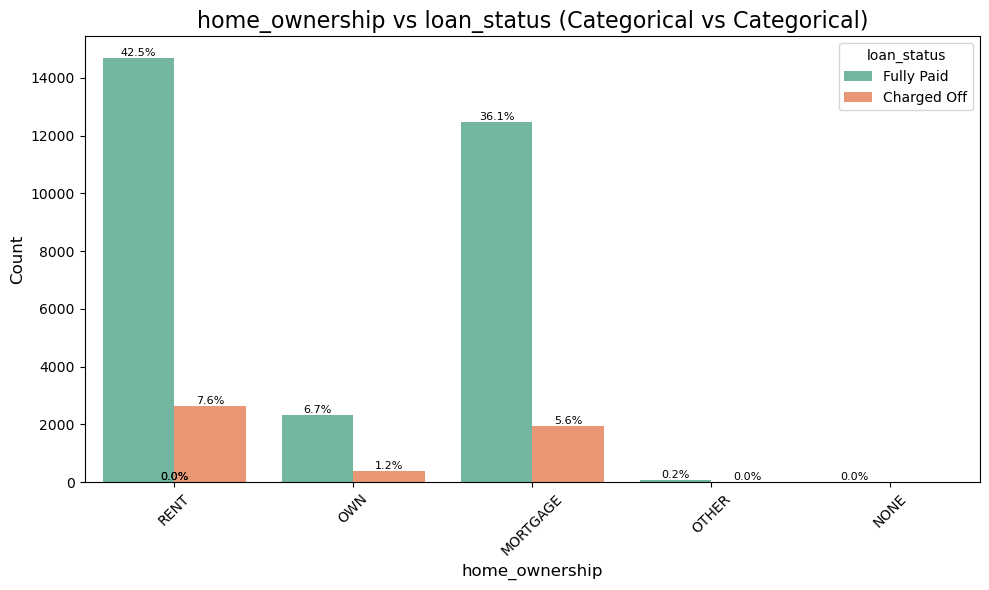

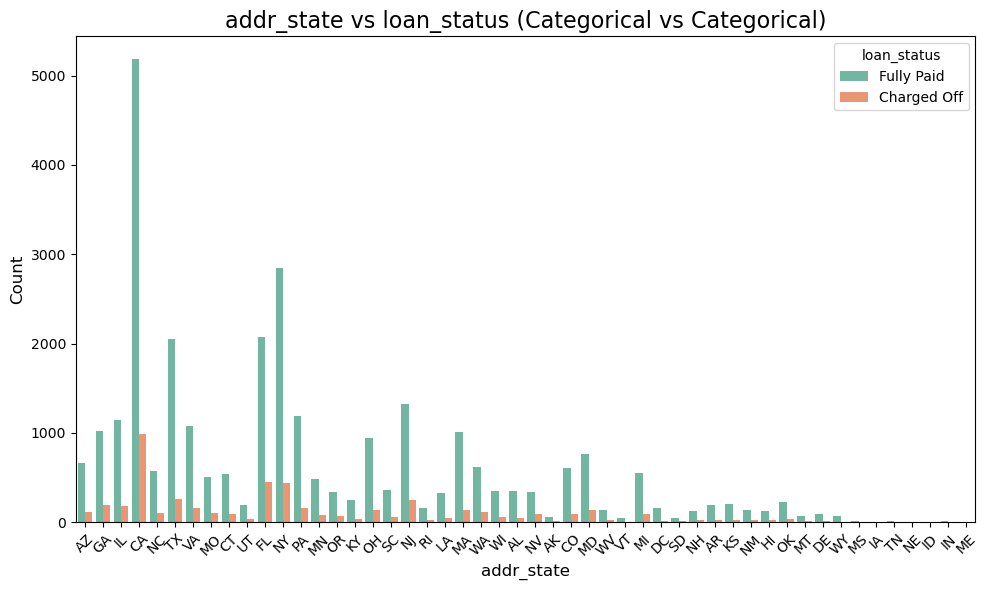

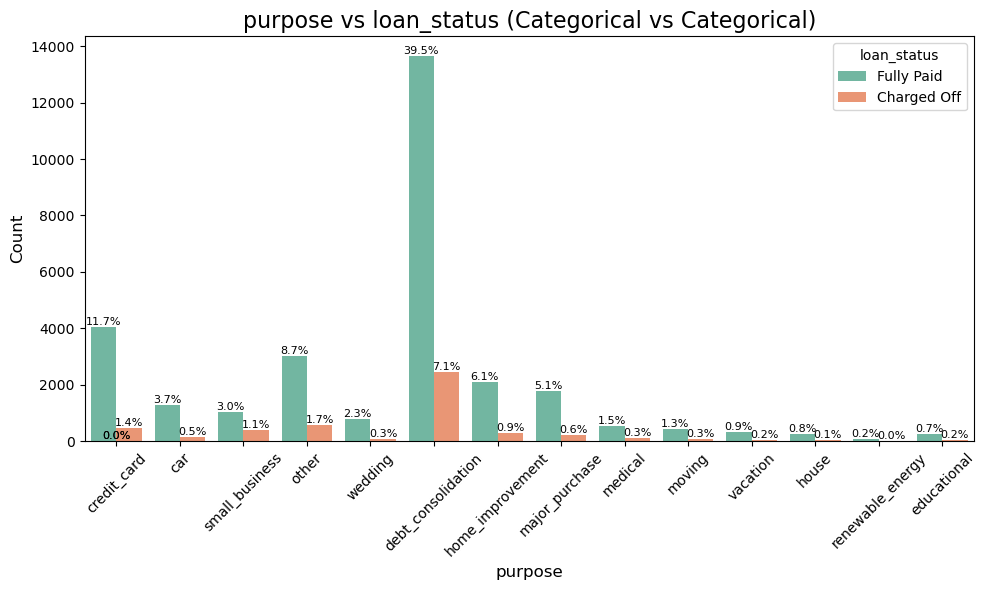

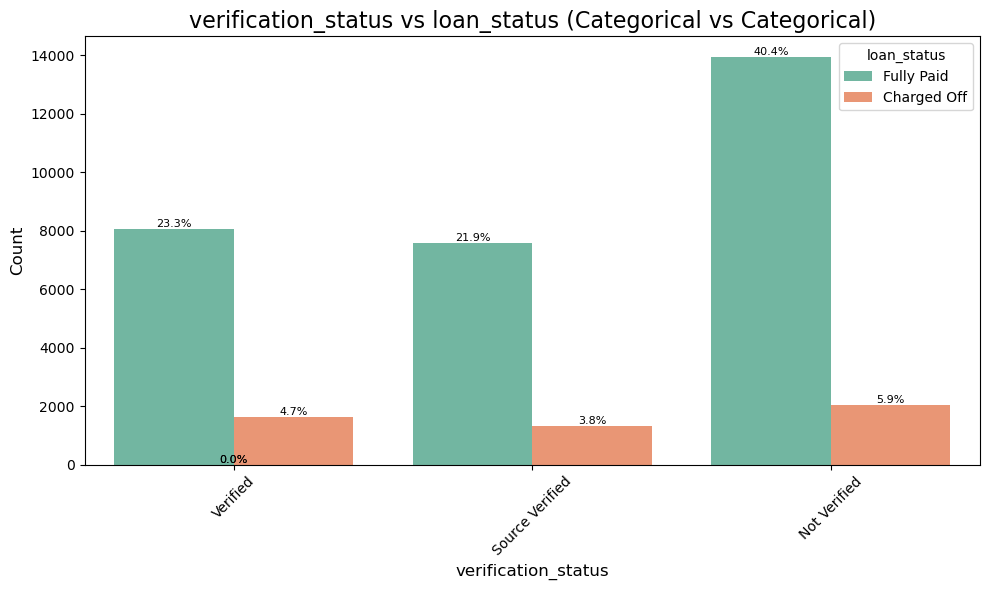

In [5514]:
for u_cat_bivar in ['home_ownership', 'addr_state', 'purpose', 'verification_status']:
    bivariate_analysis(df=loan_data, var1= u_cat_bivar, var2='loan_status', analysis_type='categorical_vs_categorical')

#### 3.2.1.2 Ordered Categorical Variables (vs loan_status)

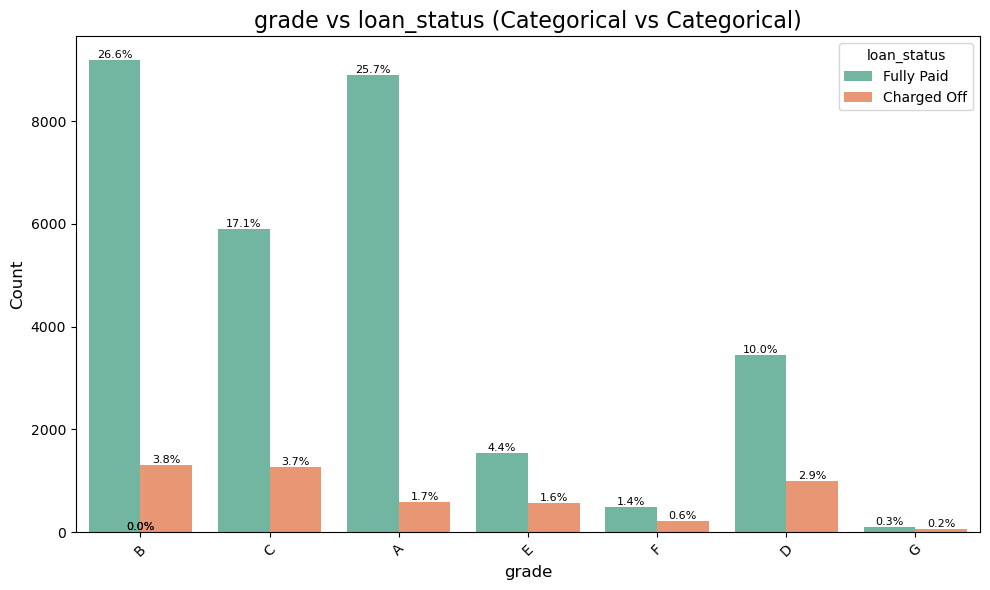

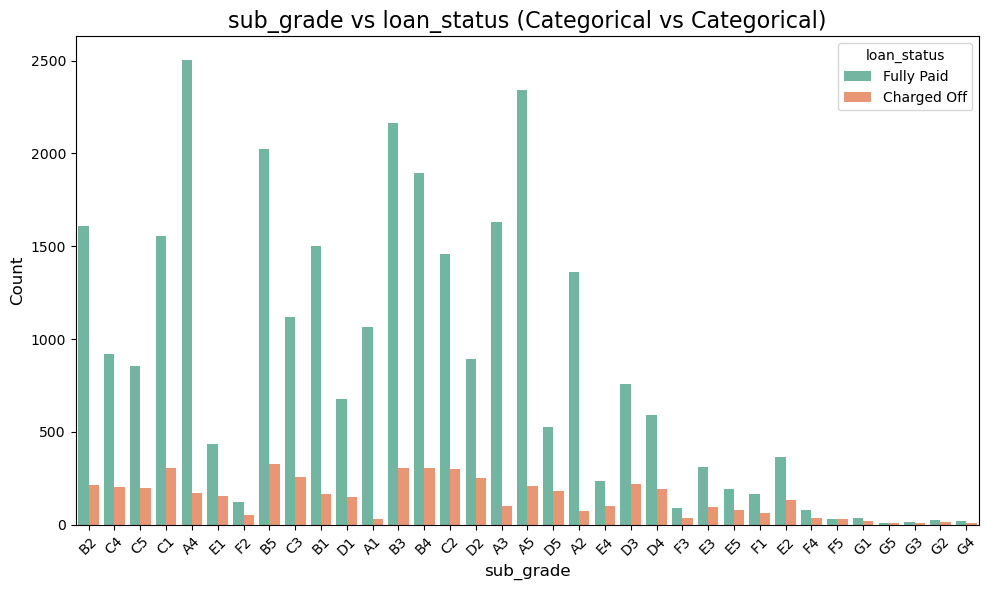

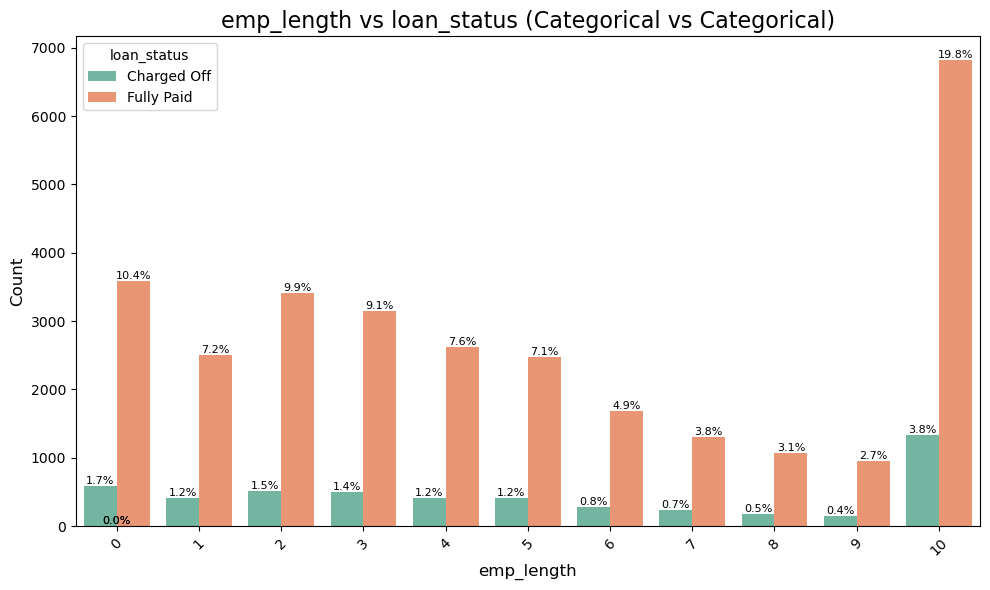

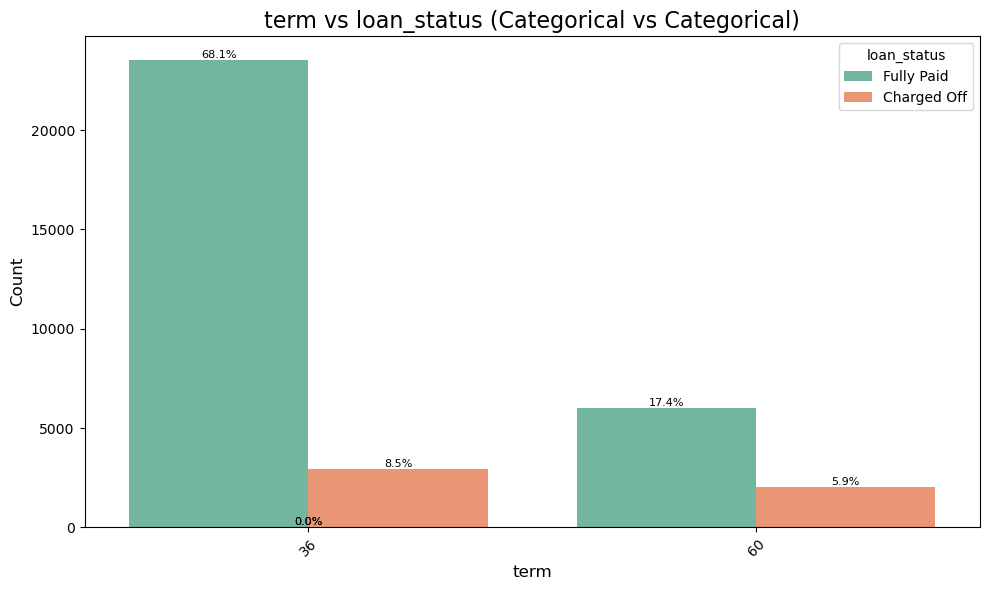

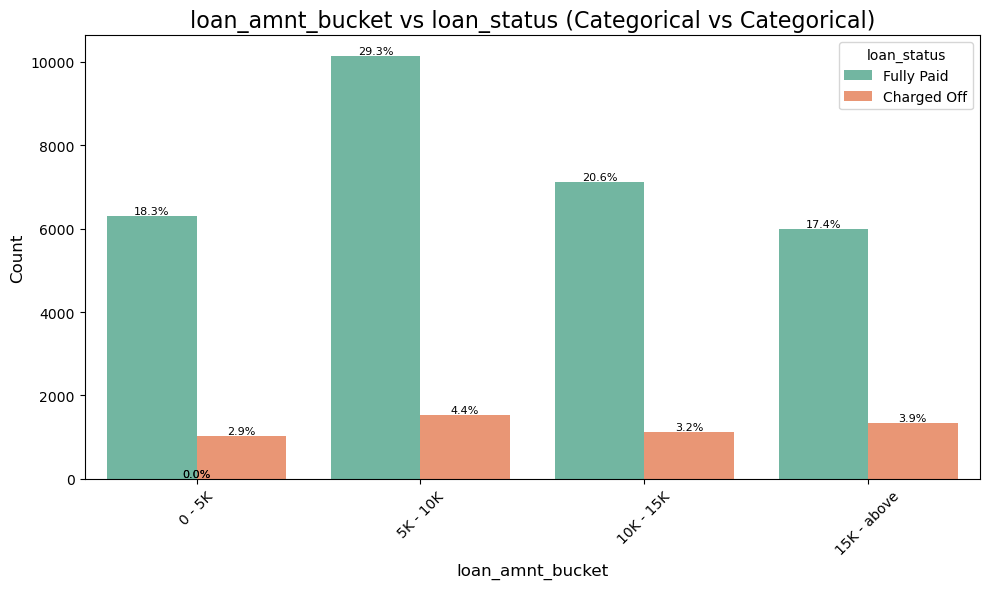

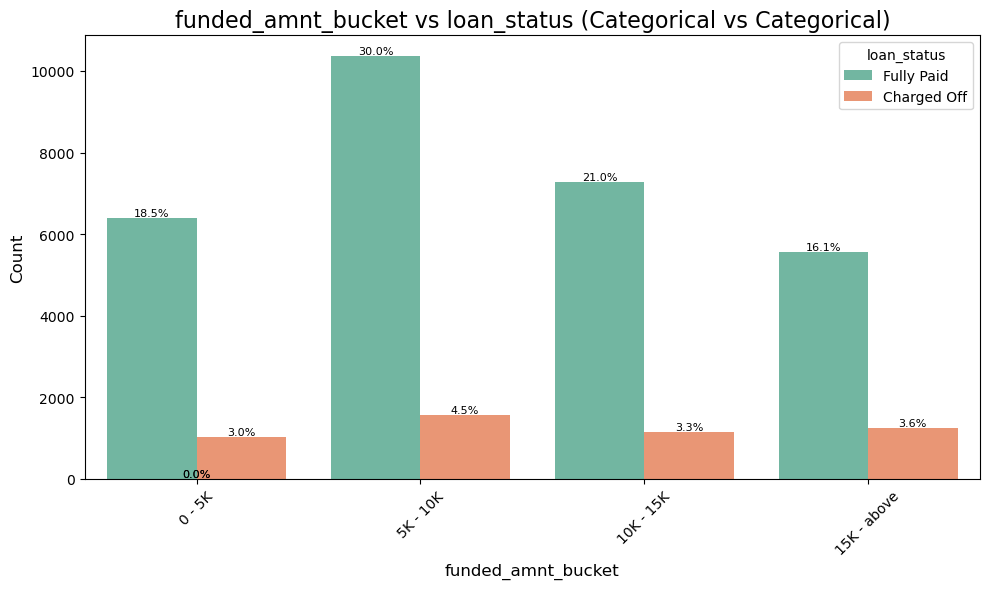

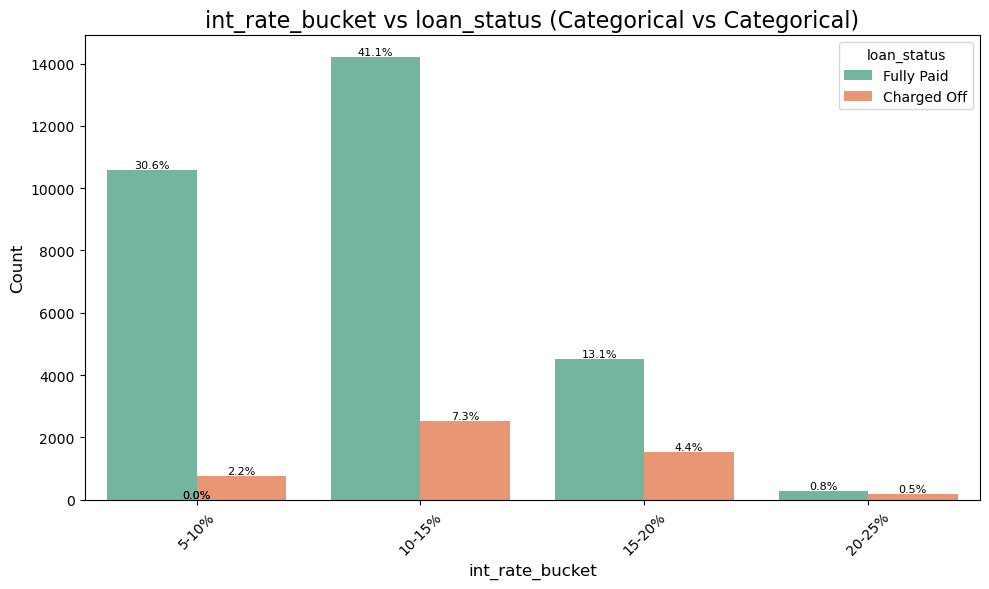

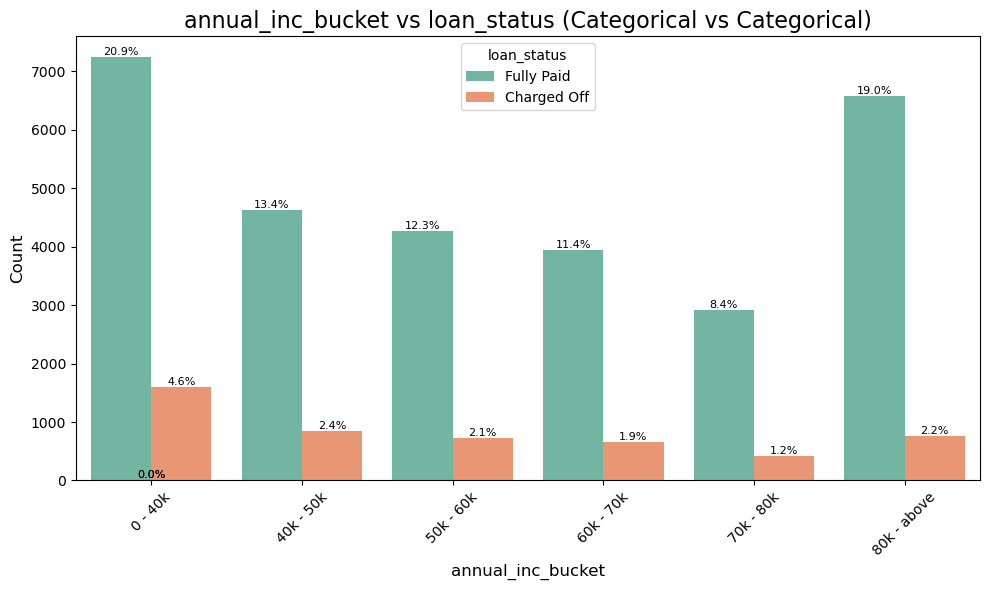

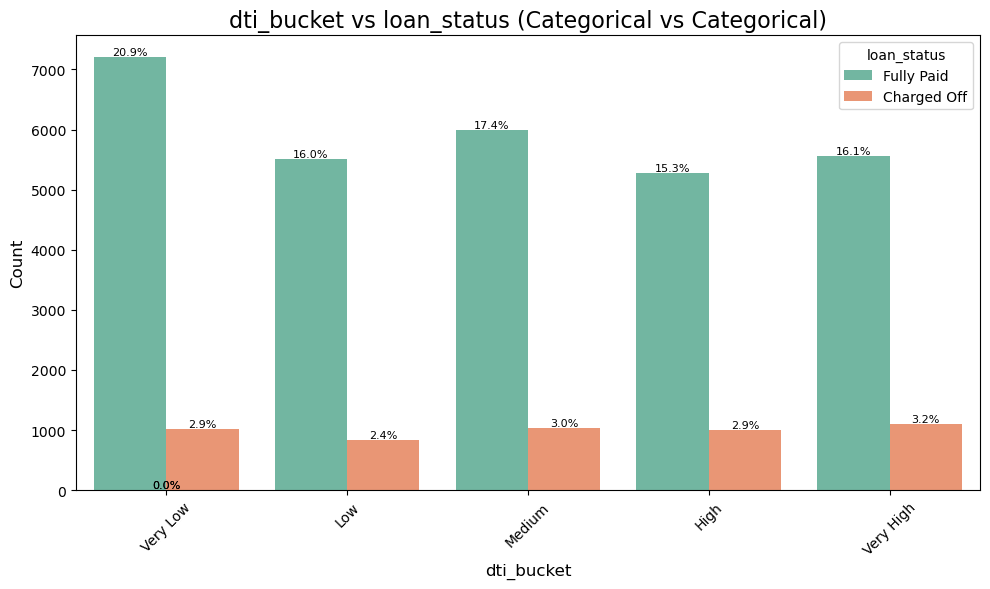

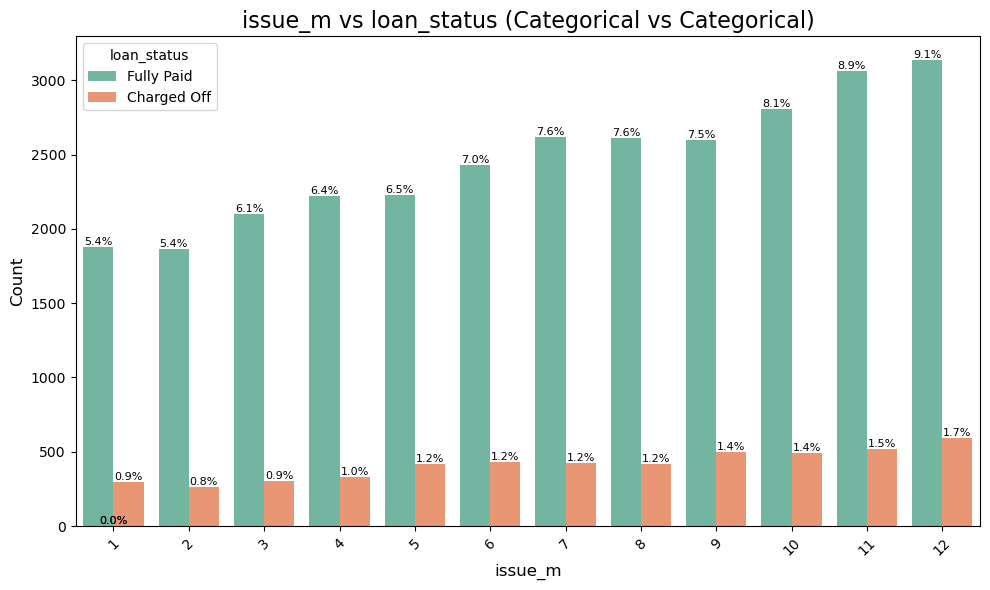

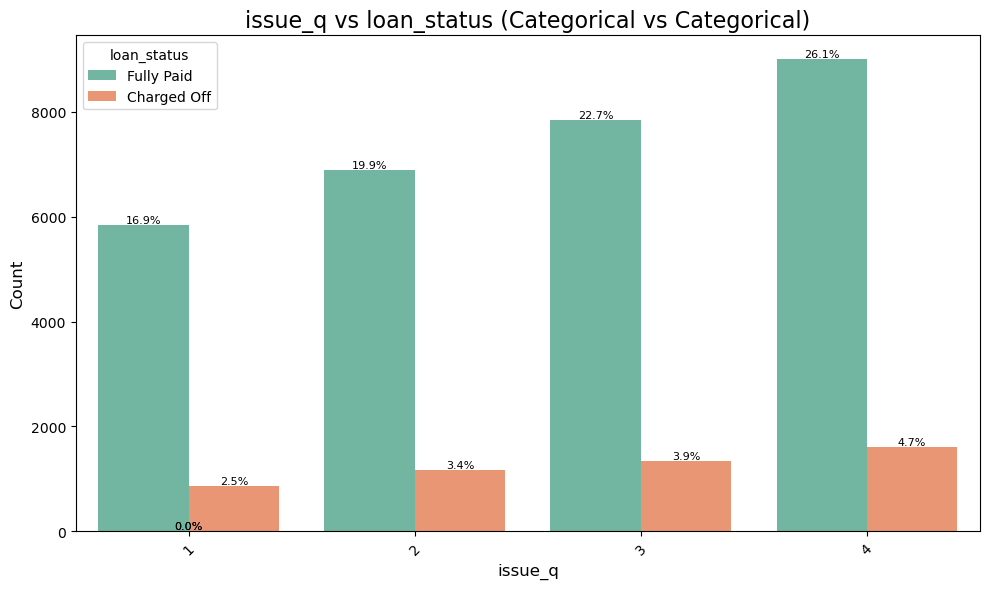

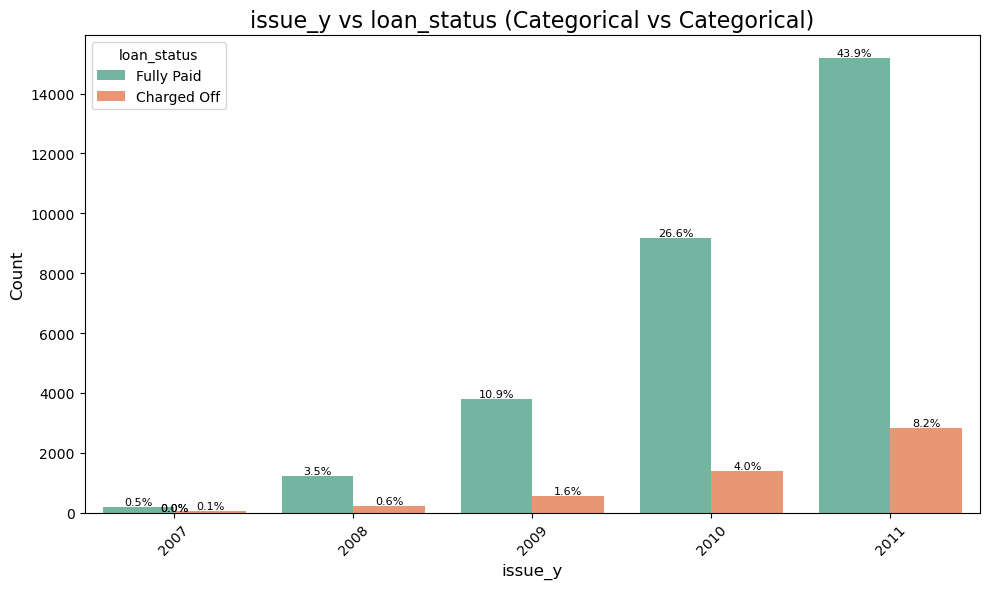

In [5516]:
for o_cat_bivar in ['grade', 'sub_grade', 'emp_length', 'term', 'loan_amnt_bucket', 'funded_amnt_bucket', 'int_rate_bucket', 'annual_inc_bucket', 'dti_bucket',
                 'issue_m', 'issue_q', 'issue_y']:
    bivariate_analysis(df=loan_data, var1= o_cat_bivar, var2='loan_status', analysis_type='categorical_vs_categorical')

#### 3.2.2 Quantitative Variables (vs loan_status)

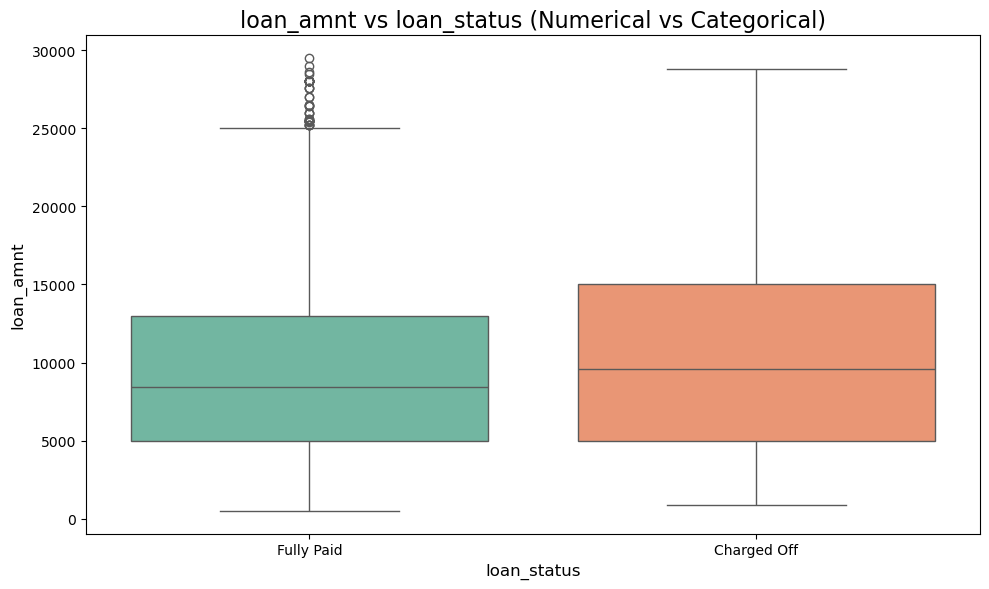

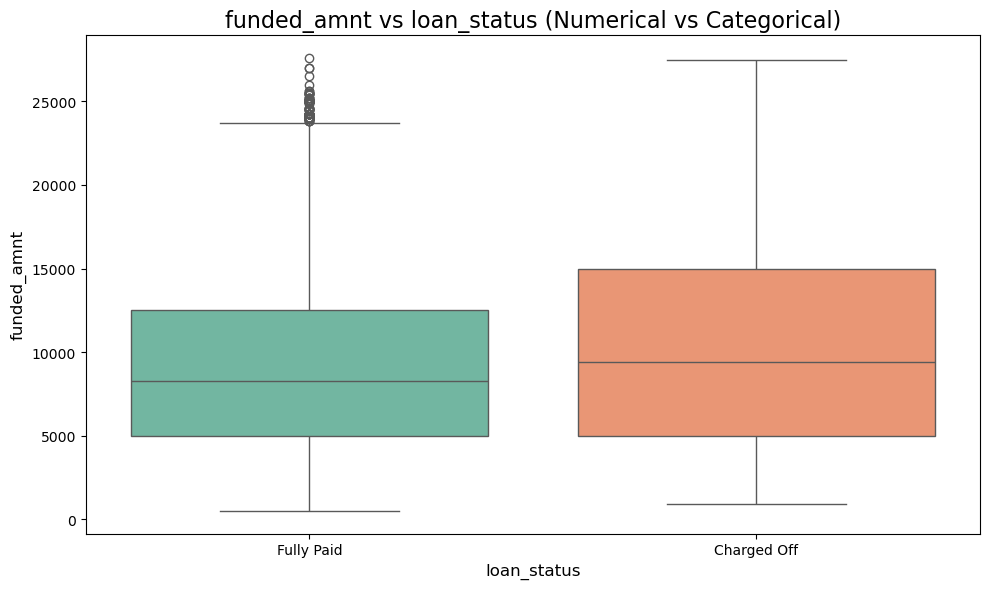

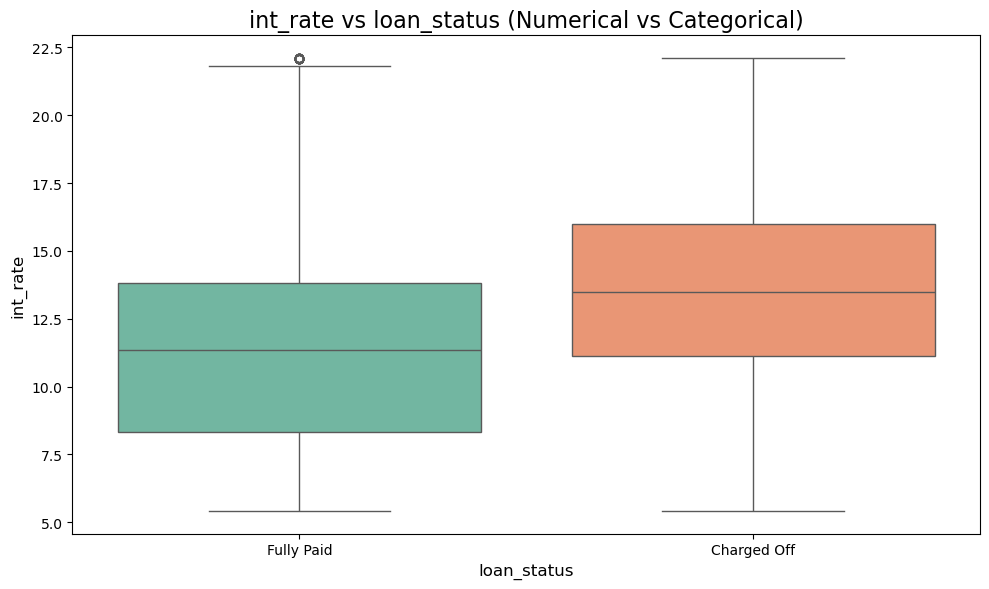

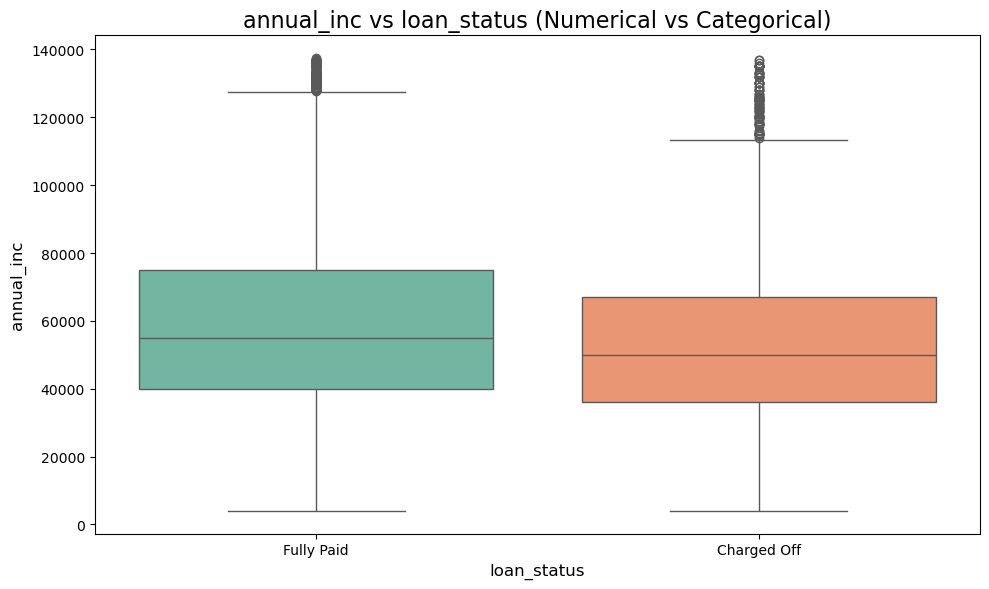

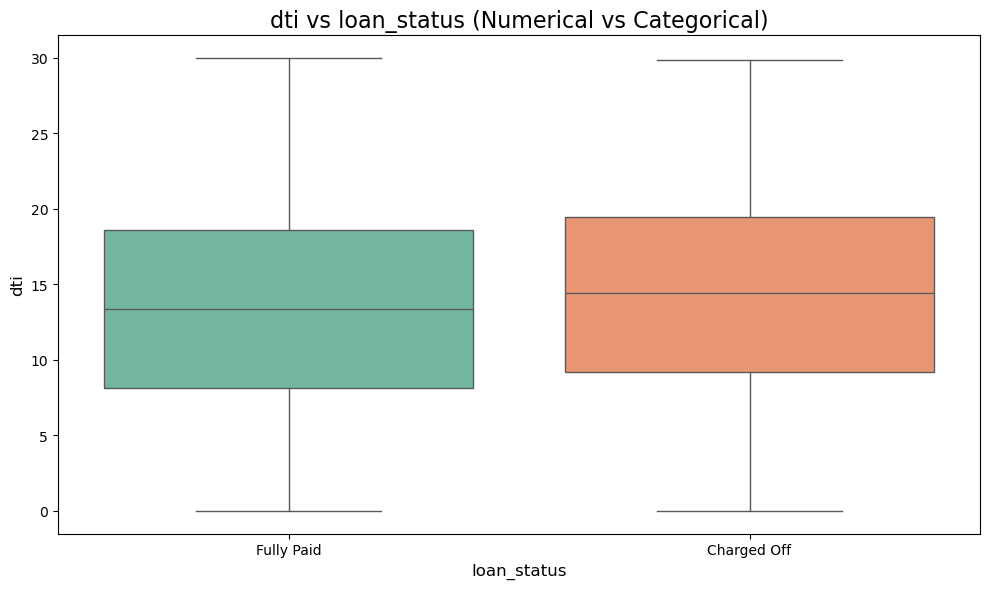

In [5518]:
for quant_bivar in ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti']:
    bivariate_analysis(df=loan_data, var1= quant_bivar, var2='loan_status', analysis_type='numerical_vs_categorical')

#### 3.2.2 Numeric vs Numeric Variables - Correlation Matrix

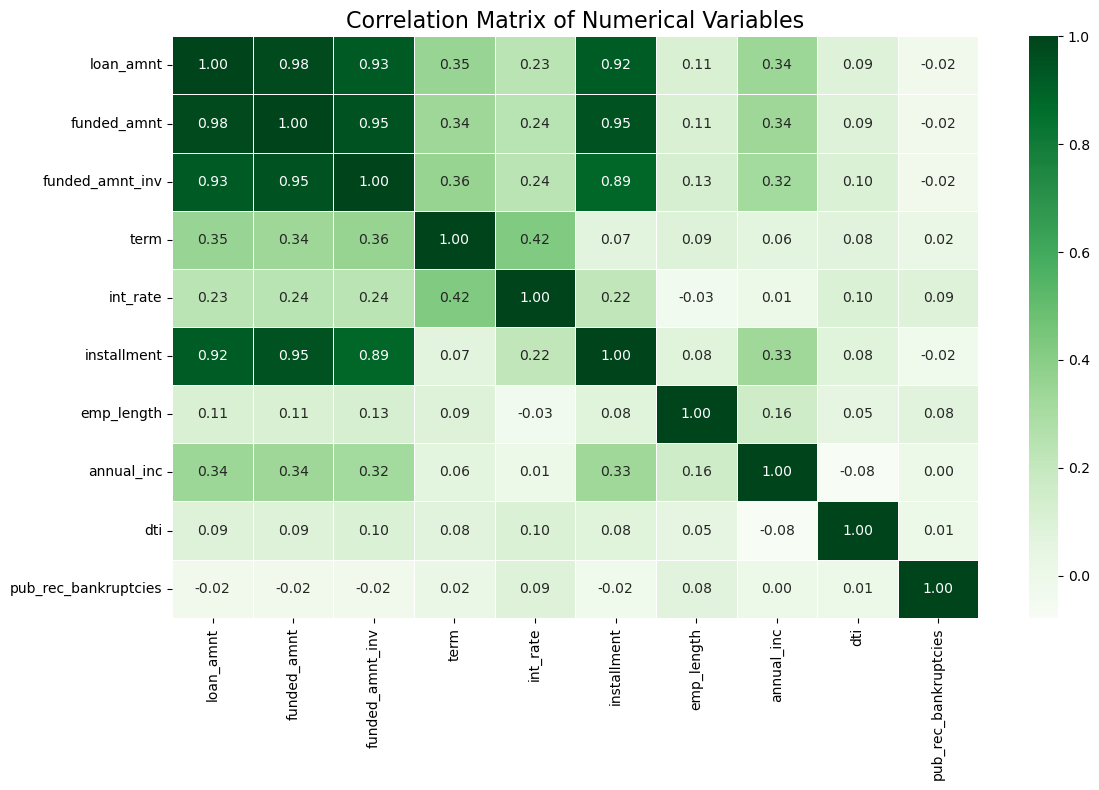

In [5520]:
# Removing irrelevant columns
corr_df = loan_data.copy()
corr_df = corr_df.drop(['issue_m', 'issue_q', 'issue_y'], axis=1)
# Plot Correlation Matrix
bivariate_analysis(df=corr_df, var1= None, var2= None, analysis_type='numerical_vs_numerical')

#### Observations from Correlation Matrix:
##### Strong Correlation
- installment has a strong correlation with funded_amnt, loan_amnt, and funded_amnt_inv
##### Moderately Strong Correlation
- term has a moderately strong correlation with interest rate
##### Weak Correlation
- annual_inc has a weak correlation with loan_amount and funded_amnt
- dti has weak correlation with most of the fields
- emp_length has weak correlation with most of the fields
- pub_rec_bankrupticies has weak correlation with almost all of the fields

---

## **Overview of Bivariate Analysis**

1. Loan applicants who rent or have a mortgaged house are more likely to default, with the majority of charged-off loans coming from renters.
2. Loan performance varies significantly across different states. Borrowers from certain states, particularly California (CA), Florida (FL), and New York(NY), have a higher likelihood of defaulting on their loans, suggesting potential regional risk factors.
3. Debt consolidation accounts for the highest number of issued loans, and it is also the category with the highest number of defaults.
4. Loans with "Not Verified" income have the highest default rate compared to those with verified income, indicating that these borrowers may pose a higher risk due to potential inaccuracies or misrepresentations in their income information.
5. Loan applicants with Loan Grades B, C, and D account for the majority of "Charged Off" loans, making these grades significant contributors to loan defaults.
6. Within the grades, sub-grades B3, B4, B5, C1, and C2 stand out as having a higher likelihood of defaults, emphasizing the need for closer scrutiny and tailored risk management strategies for these categories.
7. Applicants with over 10 years of employment recorded the highest loan defaults, followed by those employed for less than 1 year. This indicates that a lengthy employment history does not always guarantee repayment capacity, highlighting the need for more comprehensive financial assessments.
8. Short-term loans with a 36-month tenure were the most popular among defaulters.
9. Applicants with loan amounts between 5,000 and 10,000 USD had the highest default rates, followed by those with loans of USD 15,000 and above. Also, higher loan amounts are associated with a higher proportion of charged-off loans.
10. Funded loans in the 5,000 – 10,000 USD range experienced the highest number of defaults. Further, similar to the loan amount, the funded amount also shows a clear trend. Larger funded amounts are associated with a higher proportion of charged-off loans.
11. The 10–15% interest rate range saw the highest number of defaults, followed by the 15-20% range. Furthermore, higher interest rates are associated with a higher proportion of charged-off loans. This suggests that borrowers with higher interest rates may be at a greater risk of default.
12. Borrowers with annual incomes between 0 and 40,000 USD exhibited the highest default rates.
13. Borrowers who defaulted typically had very high debt-to-income (DTI) ratios, indicating that elevated levels of debt relative to income are a strong predictor of loan defaults.
14. The highest number of defaults occurred in the fourth quarter, especially in December, likely due to increased financial strain during the holiday season. Additionally, 2011 saw a 105% rise in defaults compared to 2010, which may reflect wider economic difficulties during that period.

## **Bivariate Analysis: Inferences and Recommendations**

1. **Renters vs. Homeowners**:
   - **Inference**: Renters, as opposed to homeowners, are more likely to default on loans. This may reflect the financial instability often associated with renting, such as a lack of long-term assets or potentially higher living expenses.
   - **Recommendation**: Lenders should implement stricter risk assessments for applicants who rent, including evaluating their overall financial stability more rigorously. Consider offering tailored loan products or repayment terms that are more suitable for renters, or increase interest rates for this group to offset higher risk.

2. **Regional Risk Factors (States)**:
   - **Inference**: States like California, Florida, and New York have a higher likelihood of loan defaults. This could be influenced by regional economic conditions, such as higher cost of living or regional economic downturns.
   - **Recommendation**: Lenders should apply a region-specific risk model, with higher risk premiums for borrowers from states with higher default rates. Additionally, further analysis should be done to understand the underlying economic factors in these states, which could help tailor loan offerings or repayment terms.

3. **Debt Consolidation**:
   - **Inference**: Debt consolidation loans have the highest number of defaults. This suggests that borrowers seeking to consolidate their debt may already be in financial distress, potentially with high existing debt and limited repayment capacity.
   - **Recommendation**: Lenders should assess the total debt load and repayment capacity more thoroughly for debt consolidation applicants. Offering financial counseling services or evaluating the long-term sustainability of the borrower's financial situation can help reduce defaults in this category.

4. **Income Verification**:
   - **Inference**: Loans with "Not Verified" income have the highest default rate. This highlights the risk of inaccurate or misrepresented income information, leading to higher default likelihood.
   - **Recommendation**: Lenders should prioritize verifying applicants' income to ensure accuracy and mitigate the risk of defaults. Additionally, offering lower loan amounts or higher interest rates for borrowers with unverified income can help manage risk more effectively.

5. **Loan Grades and Defaults**:
   - **Inference**: Loan Grades B, C, and D contribute significantly to defaults. These borrowers may be at higher risk due to weaker credit histories or financial instability.
   - **Recommendation**: Lenders should introduce stricter underwriting criteria for applicants in these grades. Furthermore, it may be beneficial to offer more customized loan terms, such as higher interest rates or shorter loan durations, for applicants in these grades.

6. **Loan Sub-Grades**:
   - **Inference**: Sub-grades B3, B4, B5, C1, and C2 are especially associated with high default rates. These sub-grades may indicate borrowers with riskier profiles.
   - **Recommendation**: Loan applications within these sub-grades should be subjected to enhanced scrutiny, including a deeper analysis of financial health and debt-to-income ratios. Consider using alternative credit scoring models to assess the risk more accurately for these sub-grades.

7. **Employment Duration**:
   - **Inference**: Applicants with over 10 years of employment history have the highest defaults, followed by those employed for less than 1 year. A long employment history does not necessarily correlate with loan repayment capacity, suggesting that other financial factors should be prioritized.
   - **Recommendation**: Lenders should not solely rely on employment duration when assessing loan applicants. A more comprehensive analysis of the applicant’s current financial health, including income stability and debt-to-income ratios, is essential for more accurate risk assessment.

8. **Short-Term Loans**:
   - **Inference**: Short-term loans (36 months) have a higher default rate, possibly due to the higher monthly payment burden.
   - **Recommendation**: Lenders should consider offering more flexible repayment options for short-term loans, such as extending the loan term or adjusting the payment schedule, to reduce borrower strain and defaults. Additionally, implementing more rigorous financial assessments for short-term loan applicants can help minimize risk.

9. **Loan Amounts**:
   - **Inference**: Loan amounts between 5,000 and 10,000 USD have the highest default rates, followed by larger loans. This suggests that the loan amount range may correspond to a threshold where borrowers struggle with repayment.
   - **Recommendation**: Loans in this amount range should be more carefully scrutinized, particularly for applicants with weaker financial profiles. Offering smaller loan amounts or longer repayment terms could help mitigate defaults in this category.

10. **Funded Loans and Defaults**:
    - **Inference**: Funded loans in the 5,000 – 10,000 USD range also experience the highest default rates, aligning with the loan amount bucket.
    - **Recommendation**: Lenders should focus on improving funding evaluations for loans in this range, ensuring that borrowers’ financial situations are thoroughly assessed. Offering more flexible repayment terms or adjusting the loan approval process for this range may help reduce defaults.

11. **Interest Rates**:
    - **Inference**: Interest rates in the 10-15% and 15-20% ranges are associated with the highest defaults, suggesting that these rates may not effectively deter high-risk borrowers.
    - **Recommendation**: Lenders should consider more dynamic interest rate structures, possibly offering lower rates to borrowers with stronger financial profiles while adjusting the rates based on riskier factors like credit score and debt-to-income ratio.

12. **Income and Defaults**:
    - **Inference**: Borrowers with annual incomes between 0 and 40,000 USD exhibit the highest default rates, indicating that lower income levels correlate with higher default risk.
    - **Recommendation**: Lenders should place more emphasis on assessing the financial capacity of borrowers with lower incomes. Offering smaller loan amounts or providing tailored repayment options, such as income-based repayment plans, can help mitigate defaults in this group.

13. **Debt-to-Income Ratios (DTI)**:
    - **Inference**: Borrowers with very high DTI ratios are more likely to default, indicating that higher debt relative to income is a key predictor of loan default.
    - **Recommendation**: Lenders should establish stricter DTI ratio limits during the underwriting process to reduce the likelihood of defaults. Implementing policies that prevent high DTI borrowers from accessing larger loans or offering counseling for debt management can also help mitigate risk.

14. **Seasonal Trends and Economic Factors**:
    - **Inference**: The fourth quarter, particularly December, sees the highest defaults, which may be linked to increased financial strain during the holiday season. Additionally, the 105% increase in defaults in 2011 suggests broader economic challenges during that period.
    - **Recommendation**: Lenders should anticipate higher default rates during the fourth quarter and adjust their lending strategies accordingly, possibly by offering more flexible repayment terms or temporary relief options. Monitoring broader economic trends and adjusting risk models to account for seasonal fluctuations could help reduce defaults during these peak times.